<a href="https://colab.research.google.com/github/Aelamin19/Business-Analytics/blob/main/FYP_2_0_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiple datasets will be used
#Each dataset will go through analysis before the datasets are merged and the combined dataset will be prepared and used to create the ML models

#Importing libraries

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
import sklearn
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pydot
from six import StringIO
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

#Importing the data

In [3]:
rent_df = pd.read_csv("/content/avg monthly rent 2008-2022.csv")
d_i_df = pd.read_csv("/content/Disposable income.csv")
h_p_df = pd.read_csv("/content/House purchases.csv")
crime_df = pd.read_csv('/content/recorded_crime_ireland.csv')

In [4]:
rent_df.head()

STATISTIC Label  Year Number of Bedrooms   Property Type  \
0  RTB Average Monthly Rent Report  2008            One bed  Detached house   
1  RTB Average Monthly Rent Report  2008            One bed  Detached house   
2  RTB Average Monthly Rent Report  2008            One bed  Detached house   
3  RTB Average Monthly Rent Report  2008            One bed  Detached house   
4  RTB Average Monthly Rent Report  2008            One bed  Detached house   

                Location  UNIT  VALUE  
0                 Carlow  Euro    NaN  
1            Carlow Town  Euro    NaN  
2  Graiguecullen, Carlow  Euro    NaN  
3         Tullow, Carlow  Euro    NaN  
4                  Cavan  Euro    NaN

In [5]:
d_i_df.head()

Statistic Label  Year       County  UNIT     VALUE
0  Disposable Income per Person  2000   Co. Carlow  Euro  11648.31
1  Disposable Income per Person  2000    Co. Cavan  Euro  11032.89
2  Disposable Income per Person  2000    Co. Clare  Euro  12190.60
3  Disposable Income per Person  2000     Co. Cork  Euro  12170.97
4  Disposable Income per Person  2000  Co. Donegal  Euro  10246.59

In [6]:
h_p_df.head()

Statistic Label         Month Type of Dwelling Dwelling Status  \
0  Mean Sale Price  2010 January        Apartment             New   
1  Mean Sale Price  2010 January        Apartment             New   
2  Mean Sale Price  2010 January        Apartment             New   
3  Mean Sale Price  2010 January        Apartment             New   
4  Mean Sale Price  2010 January        Apartment             New   

  Stamp Duty Event             RPPI Region  UNIT     VALUE  
0          Filings  Border Excluding Louth  Euro  170250.0  
1          Filings                   Cavan  Euro       NaN  
2          Filings                 Donegal  Euro       NaN  
3          Filings                 Leitrim  Euro       NaN  
4          Filings                Monaghan  Euro       NaN

In [7]:
crime_df.head()

STATISTIC Label Quarter  \
0  Recorded Crime Offences under Reservation  2003Q1   
1  Recorded Crime Offences under Reservation  2003Q1   
2  Recorded Crime Offences under Reservation  2003Q1   
3  Recorded Crime Offences under Reservation  2003Q1   
4  Recorded Crime Offences under Reservation  2003Q1   

                  Garda Division                     Type of Offence    UNIT  \
0  Cavan/Monaghan Garda Division                   Homicide offences  Number   
1  Cavan/Monaghan Garda Division                              Murder  Number   
2  Cavan/Monaghan Garda Division                        Manslaughter  Number   
3  Cavan/Monaghan Garda Division                         Infanticide  Number   
4  Cavan/Monaghan Garda Division  Dangerous driving leading to death  Number   

   VALUE  
0      1  
1      0  
2      0  
3      0  
4      1

#Data preprocessing - Rent df

In [8]:
rent_df['Property Type'].unique()

array(['Detached house', 'Semi detached house', 'Terrace house',
       'Apartment', 'Other flats'], dtype=object)

In [9]:
rent_df['Location'].unique()

array(['Carlow', 'Carlow Town', 'Graiguecullen, Carlow', 'Tullow, Carlow',
       'Cavan', 'Cavan Town', 'Bailieborough, Cavan',
       'Ballyconnell, Cavan', 'Ballyjamesduff, Cavan', 'Belturbet, Cavan',
       'Cootehill, Cavan', 'Kingscourt, Cavan', 'Virginia, Cavan',
       'Clare', 'Ennis, Clare', 'Killaloe, Clare', 'Kilrush, Clare',
       'Newmarket-On-Fergus, Clare', 'Shannon, Clare',
       'Sixmilebridge, Clare', 'Cork', 'Cork City', 'Ballincollig, Cork',
       'Ballintemple, Cork', 'Ballinure, Cork', 'Bandon, Cork',
       'Bantry, Cork', 'Bishopstown, Cork', 'Blackpool, Cork',
       'Blackrock, Cork', 'Blarney, Cork', 'Carrigaline, Cork',
       'Carrigtwohill, Cork', 'Castlemartyr, Cork', 'Charleville, Cork',
       'Clonakilty, Cork', 'Cloyne, Cork', 'Cobh, Cork',
       'Crosshaven, Cork', 'Douglas, Cork', 'Dunmanway, Cork',
       'Fermoy, Cork', 'Frankfield, Cork', 'Glanmire, Cork',
       'Kanturk, Cork', 'Kinsale, Cork', 'Macroom, Cork', 'Mallow, Cork',
       'Midl

In [10]:
#The 'All properties' value is not needed, so it will be removed
rent_df = rent_df.drop(rent_df[rent_df['Property Type'] == 'All property types'].index)

In [11]:
#Now, unnecessary columns will be removed
rent_df = rent_df.drop("STATISTIC Label", axis = "columns")
rent_df = rent_df.drop("UNIT", axis = "columns")

In [12]:
#null values
rent_df.isna().sum()

Year                       0
Number of Bedrooms         0
Property Type              0
Location                   0
VALUE                 152167
dtype: int64

In [13]:
#The rows with null values will be removed
rent_df.dropna(subset=["VALUE"], inplace=True)

##creating a "regions" column

In [14]:
#try with * if not working
def get_region(county, region):
    if county in region["Dublin"]:
        return 'Dublin'
    if county in region["Border"]:
        return 'Border'
    elif county in region["West"]:
        return 'West'
    elif county in region["Mid_West"]:
        return 'Mid_West'
    elif county in region["Mid_East"]:
        return 'Mid_East'
    elif county in region["South_East"]:
        return 'South_East'
    elif county in region["South_West"]:
        return 'South_West'
    elif county in region["Midland"]:
        return "Midland"
    else:
        return None

In [15]:
Dublin = ["Dublin", "Dún Laoghaire-Rathdown", "South-Dublin", "Fingal"]
Border = ["Cavan", "Donegal", "Leitrim", "Monaghan", "Sligo"]
West = ["Mayo", "Roscommon", "Galway"]
Mid_West = ["Clare", "Tipperary", "Limerick"]
Mid_East = ["Kildare", "Louth", "Meath", "Wicklow"]
South_East = ["Carlow", "Kilkenny", "Wexford", "Waterford"]
South_West = ["Kerry", "Cork"]
Midland = ["Laois", "Longford", "Offaly", "Westmeath"]

In [16]:
region = {"Dublin": Dublin, "Border": Border, "West": West, "Mid_West": Mid_West, "Mid_East": Mid_East, "South_East": South_East, "South_West": South_West, "Midland": Midland}
rent_df['region'] = rent_df["Location"].apply(get_region, args=(region,))
rent_df.head(10)

Year Number of Bedrooms        Property Type   Location    VALUE  \
20   2008            One bed       Detached house       Cork   556.54   
71   2008            One bed       Detached house     Dublin  1031.97   
238  2008            One bed       Detached house     Galway   518.02   
466  2008            One bed  Semi detached house       Cork   624.69   
467  2008            One bed  Semi detached house  Cork City   680.40   
517  2008            One bed  Semi detached house     Dublin   855.05   
561  2008            One bed  Semi detached house   Dublin 3   745.08   
570  2008            One bed  Semi detached house   Dublin 4   911.54   
582  2008            One bed  Semi detached house   Dublin 6   801.92   
594  2008            One bed  Semi detached house   Dublin 7   642.81   

         region  
20   South_West  
71       Dublin  
238        West  
466  South_West  
467        None  
517      Dublin  
561        None  
570        None  
582        None  
594        None

In [17]:
rent_df.rename(columns = {"VALUE": "rent_value"},
          inplace = True)

In [18]:
#The columns with counties will now be removed because the regions are much better to work with
rent_df = rent_df.drop("Location", axis = "columns")

In [19]:
rent_df.head(10)

Year Number of Bedrooms        Property Type  rent_value      region
20   2008            One bed       Detached house      556.54  South_West
71   2008            One bed       Detached house     1031.97      Dublin
238  2008            One bed       Detached house      518.02        West
466  2008            One bed  Semi detached house      624.69  South_West
467  2008            One bed  Semi detached house      680.40        None
517  2008            One bed  Semi detached house      855.05      Dublin
561  2008            One bed  Semi detached house      745.08        None
570  2008            One bed  Semi detached house      911.54        None
582  2008            One bed  Semi detached house      801.92        None
594  2008            One bed  Semi detached house      642.81        None

##Changing categorical columns to become useful

In [20]:
rent_df = rent_df.drop(rent_df[rent_df['Number of Bedrooms'] == '1 to 2 bed'].index)
rent_df = rent_df.drop(rent_df[rent_df['Number of Bedrooms'] == '1 to 3 bed'].index)
#Lets now assign weights for the number of bedrooms
rent_df["Number of Bedrooms"] = rent_df["Number of Bedrooms"].map({"Four plus bed": 4,
                                                                   "Three bed": 3,
                                                                   "Two bed": 2,
                                                                   "One bed": 1})

In [21]:
#rent_df = rent_df.join(pd.get_dummies(rent_df["Number of Bedrooms"])).drop(["Number of Bedrooms"], axis=1)
rent_df = rent_df.join(pd.get_dummies(rent_df["Property Type"])).drop(["Property Type"], axis=1)

In [22]:
#We will give different weights to the property types
#after creating dummy variables so that the type of property is visible
#rent_df['Detached house'].replace(1, 4, inplace= True)
#rent_df['Semi detached house'].replace(1, 3, inplace= True)
#rent_df['Terrace house'].replace(1, 2, inplace= True)


In [23]:
rent_df = rent_df.replace({True: 1, False: 0})

In [24]:
rent_df

Year  Number of Bedrooms  rent_value      region  Apartment  \
20      2008                   1      556.54  South_West          0   
71      2008                   1     1031.97      Dublin          0   
238     2008                   1      518.02        West          0   
466     2008                   1      624.69  South_West          0   
467     2008                   1      680.40        None          0   
...      ...                 ...         ...         ...        ...   
200046  2022                   4     1875.23        West          1   
200047  2022                   4     1994.87        None          1   
200114  2022                   4     1447.89    Mid_West          1   
200115  2022                   4     1503.50        None          1   
200325  2022                   4     2552.74      Dublin          0   

        Detached house  Other flats  Semi detached house  Terrace house  
20                   1            0                    0              0  
71                   1            0                    0              0  
238                  1            0                    0              0  
466                  0            0                    1              0  
467                  0            0                    1              0  
...                ...          ...                  ...            ...  
200046               0            0                    0              0  
200047               0            0                    0              0  
200114               0            0                    0              0  
200115               0            0                    0              0  
200325               0            1                    0              0  

[24578 rows x 9 columns]

#Data Preprocessing - Disposable Income

In [25]:
d_i_df.head(15)

Statistic Label  Year        County  UNIT     VALUE
0   Disposable Income per Person  2000    Co. Carlow  Euro  11648.31
1   Disposable Income per Person  2000     Co. Cavan  Euro  11032.89
2   Disposable Income per Person  2000     Co. Clare  Euro  12190.60
3   Disposable Income per Person  2000      Co. Cork  Euro  12170.97
4   Disposable Income per Person  2000   Co. Donegal  Euro  10246.59
5   Disposable Income per Person  2000    Co. Dublin  Euro  14407.79
6   Disposable Income per Person  2000    Co. Galway  Euro  11868.91
7   Disposable Income per Person  2000     Co. Kerry  Euro  10819.80
8   Disposable Income per Person  2000   Co. Kildare  Euro  13367.51
9   Disposable Income per Person  2000  Co. Kilkenny  Euro  11109.86
10  Disposable Income per Person  2000     Co. Laois  Euro  11268.14
11  Disposable Income per Person  2000   Co. Leitrim  Euro  11089.31
12  Disposable Income per Person  2000  Co. Limerick  Euro  12554.05
13  Disposable Income per Person  2000  Co. Longford  Euro  11533.61
14  Disposable Income per Person  2000     Co. Louth  Euro  12505.64

In [26]:
#Now, unnecessary columns will be removed
d_i_df = d_i_df.drop("Statistic Label", axis = "columns")
d_i_df = d_i_df.drop("UNIT", axis = "columns")

In [27]:
d_i_df.rename(columns = {"VALUE": "avg_disposable_income"},
          inplace = True)

In [28]:
d_i_df['County'].unique()

array(['Co. Carlow', 'Co. Cavan', 'Co. Clare', 'Co. Cork', 'Co. Donegal',
       'Co. Dublin', 'Co. Galway', 'Co. Kerry', 'Co. Kildare',
       'Co. Kilkenny', 'Co. Laois', 'Co. Leitrim', 'Co. Limerick',
       'Co. Longford', 'Co. Louth', 'Co. Mayo', 'Co. Meath',
       'Co. Monaghan', 'Co. Offaly', 'Co. Roscommon', 'Co. Sligo',
       'Co. Tipperary', 'Co. Waterford', 'Co. Westmeath', 'Co. Wexford',
       'Co. Wicklow'], dtype=object)

In [29]:
#remove 'Co.' from strings in County column
d_i_df["County"] = d_i_df["County"].str.replace('Co. ', '')

##creating a "regions" column

In [30]:
region = {"Dublin": Dublin, "Border": Border, "West": West, "Mid_West": Mid_West, "Mid_East": Mid_East, "South_East": South_East, "South_West": South_West, "Midland": Midland}
d_i_df['region'] = d_i_df["County"].apply(get_region, args=(region,))
d_i_df.head(10)

Year    County  avg_disposable_income      region
0  2000    Carlow               11648.31  South_East
1  2000     Cavan               11032.89      Border
2  2000     Clare               12190.60    Mid_West
3  2000      Cork               12170.97  South_West
4  2000   Donegal               10246.59      Border
5  2000    Dublin               14407.79      Dublin
6  2000    Galway               11868.91        West
7  2000     Kerry               10819.80  South_West
8  2000   Kildare               13367.51    Mid_East
9  2000  Kilkenny               11109.86  South_East

In [31]:
#The columns with counties will now be removed because the regions are much better to work with
d_i_df = d_i_df.drop("County", axis = "columns")

In [32]:
#null values
d_i_df.isna().sum()

Year                     0
avg_disposable_income    0
region                   0
dtype: int64

In [33]:
#The rows with null values will be removed
d_i_df.dropna(subset=["region"], inplace=True)

#Data Preprocessing - House Purchases

In [34]:
h_p_df = h_p_df.drop("Statistic Label", axis = "columns")
h_p_df = h_p_df.drop("UNIT", axis = "columns")

In [35]:
#removing the letters from the month column to make it a year column
h_p_df['Month'] = h_p_df['Month'].str.replace('\D', '', regex=True)

In [36]:
h_p_df.rename(columns = {"Month": "Year"},
          inplace = True)

In [37]:
h_p_df.rename(columns = {"VALUE": "house_purchase_price"},
          inplace = True)

In [38]:
h_p_df.head()

Year Type of Dwelling Dwelling Status Stamp Duty Event  \
0  2010        Apartment             New          Filings   
1  2010        Apartment             New          Filings   
2  2010        Apartment             New          Filings   
3  2010        Apartment             New          Filings   
4  2010        Apartment             New          Filings   

              RPPI Region  house_purchase_price  
0  Border Excluding Louth              170250.0  
1                   Cavan                   NaN  
2                 Donegal                   NaN  
3                 Leitrim                   NaN  
4                Monaghan                   NaN

In [39]:
h_p_df.rename(columns = {"RPPI Region": "County"},
          inplace = True)

In [40]:
h_p_df['Year'] = h_p_df['Year'].astype('int')

##creating a "regions" column

In [41]:
h_p_df['County'].unique()

array(['Border Excluding Louth', 'Cavan', 'Donegal', 'Leitrim',
       'Monaghan', 'Sligo', 'Midland', 'Laois', 'Longford', 'Offaly',
       'Westmeath', 'West', 'Galway City', 'Galway County', 'Mayo',
       'Roscommon', 'Dublin', 'Dublin City', 'Dún Laoghaire-Rathdown',
       'Fingal', 'South Dublin', 'Mid-East including Louth', 'Kildare',
       'Louth', 'Meath', 'Wicklow', 'Mid-West including South Tipperary',
       'Limerick City', 'Limerick County', 'Clare', 'Tipperary',
       'South-East excluding South Tipperary', 'Carlow', 'Kilkenny',
       'Waterford City', 'Waterford County', 'Wexford', 'South-West',
       'Cork City', 'Cork County', 'Kerry'], dtype=object)

In [42]:
#The dataset has counties as well as regions
#The regions will be removed because the counties differ from my created regions
h_p_df = h_p_df.drop(h_p_df[h_p_df['County'] == 'Border Excluding Louth'].index)
h_p_df = h_p_df.drop(h_p_df[h_p_df['County'] == 'South-East excluding South Tipperary'].index)
h_p_df = h_p_df.drop(h_p_df[h_p_df['County'] == 'West'].index)
h_p_df = h_p_df.drop(h_p_df[h_p_df['County'] == 'Mid-East including Louth'].index)
h_p_df = h_p_df.drop(h_p_df[h_p_df['County'] == 'Mid-West including South Tipperary'].index)
h_p_df = h_p_df.drop(h_p_df[h_p_df['County'] == 'South-East excluding South Tipperary'].index)
h_p_df = h_p_df.drop(h_p_df[h_p_df['County'] == 'South-West'].index)
h_p_df = h_p_df.drop(h_p_df[h_p_df['County'] == 'Midland'].index)


In [43]:
h_p_df["County"] = h_p_df["County"].str.replace(' City', '')
h_p_df["County"] = h_p_df["County"].str.replace(' County', '')

In [44]:
region = {"Dublin": Dublin, "Border": Border, "West": West, "Mid_West": Mid_West, "Mid_East": Mid_East, "South_East": South_East, "South_West": South_West, "Midland": Midland}
h_p_df['region'] = h_p_df["County"].apply(get_region, args=(region,))
h_p_df.head(10)

Year Type of Dwelling Dwelling Status Stamp Duty Event     County  \
1   2010        Apartment             New          Filings      Cavan   
2   2010        Apartment             New          Filings    Donegal   
3   2010        Apartment             New          Filings    Leitrim   
4   2010        Apartment             New          Filings   Monaghan   
5   2010        Apartment             New          Filings      Sligo   
7   2010        Apartment             New          Filings      Laois   
8   2010        Apartment             New          Filings   Longford   
9   2010        Apartment             New          Filings     Offaly   
10  2010        Apartment             New          Filings  Westmeath   
12  2010        Apartment             New          Filings     Galway   

    house_purchase_price   region  
1                    NaN   Border  
2                    NaN   Border  
3                    NaN   Border  
4                    NaN   Border  
5               170250.0   Border  
7               199995.0  Midland  
8                    NaN  Midland  
9                    NaN  Midland  
10              256061.0  Midland  
12              490000.0     West

In [45]:
#The columns with counties will now be removed because the regions are much better to work with
h_p_df = h_p_df.drop("County", axis = "columns")

In [46]:
#Null values
h_p_df.isna().sum()

Year                       0
Type of Dwelling           0
Dwelling Status            0
Stamp Duty Event           0
house_purchase_price    7829
region                  1248
dtype: int64

In [47]:
#The rows with null values will be removed
h_p_df.dropna(subset=["house_purchase_price"], inplace=True)
h_p_df.dropna(subset=["region"], inplace=True)

#Data Preprocessing - Crime df

In [48]:
year = []
for i in crime_df['Quarter']:
  year.append(i[:4])


In [49]:
crime_df['Year'] = year

In [50]:
crime_df.rename(columns = {'VALUE':'Number_of_Crimes'}, inplace = True)

##creating a "regions" column

In [51]:
crime_df['Garda Division'].unique()

array(['Cavan/Monaghan Garda Division', 'Donegal Garda Division',
       'Sligo/Leitrim Garda Division', 'Louth Garda Division',
       'Clare Garda Division', 'Mayo Garda Division',
       'Galway Garda Division', 'Roscommon/Longford Garda Division',
       'Cork City Garda Division', 'Cork North Garda Division',
       'Cork West Garda Division', 'Kerry Garda Division',
       'Limerick Garda Division', 'Laois/Offaly Garda Division',
       'Meath Garda Division', 'Wicklow Garda Division',
       'Westmeath Garda Division', 'Kildare Garda Division',
       'Tipperary Garda Division', 'Wexford Garda Division',
       'Kilkenny/Carlow Garda Division', 'Waterford Garda Division',
       'D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division'],
      dtype=object)

In [52]:
Dublin = ["D.M.R. South Central Garda Division", "D.M.R. North Central Garda Division", "D.M.R. Northern Garda Division", "D.M.R. Southern Garda Division", "D.M.R. Eastern Garda Division", "D.M.R. Western Garda Division"]
Border = ["Cavan/Monaghan Garda Division", "Donegal Garda Division", "Sligo/Leitrim Garda Division"]
West = ["Mayo Garda Division", "Roscommon/Longford Garda Division", "Galway Garda Division"]
Mid_West = ["Clare Garda Division", "Tipperary Garda Division", "Limerick Garda Division"]
Mid_East = ["Kildare Garda Division", "Louth Garda Division", "Meath Garda Division", "Wicklow Garda Division"]
South_East = ["Kilkenny/Carlow Garda Division", "Wexford Garda Division", "Waterford Garda Division"]
South_West = ["Kerry Garda Division", "Cork City Garda Division", "Cork West Garda Division"]
Midland = ["Laois/Offaly Garda Division", "Westmeath Garda Division"]

In [53]:
crime_df

STATISTIC Label Quarter  \
0       Recorded Crime Offences under Reservation  2003Q1   
1       Recorded Crime Offences under Reservation  2003Q1   
2       Recorded Crime Offences under Reservation  2003Q1   
3       Recorded Crime Offences under Reservation  2003Q1   
4       Recorded Crime Offences under Reservation  2003Q1   
...                                           ...     ...   
157047  Recorded Crime Offences under Reservation  2022Q3   
157048  Recorded Crime Offences under Reservation  2022Q3   
157049  Recorded Crime Offences under Reservation  2022Q3   
157050  Recorded Crime Offences under Reservation  2022Q3   
157051  Recorded Crime Offences under Reservation  2022Q3   

                       Garda Division  \
0       Cavan/Monaghan Garda Division   
1       Cavan/Monaghan Garda Division   
2       Cavan/Monaghan Garda Division   
3       Cavan/Monaghan Garda Division   
4       Cavan/Monaghan Garda Division   
...                               ...   
157047  D.M.R. Western Garda Division   
157048  D.M.R. Western Garda Division   
157049  D.M.R. Western Garda Division   
157050  D.M.R. Western Garda Division   
157051  D.M.R. Western Garda Division   

                                          Type of Offence    UNIT  \
0                                       Homicide offences  Number   
1                                                  Murder  Number   
2                                            Manslaughter  Number   
3                                             Infanticide  Number   
4                      Dangerous driving leading to death  Number   
...                                                   ...     ...   
157047  Offences against government, justice procedure...  Number   
157048         Offences against government and its agents  Number   
157049  Organisation of crime and conspiracy to commit...  Number   
157050                   Perverting the course of justice  Number   
157051  Offences while in custody, breach of court orders  Number   

        Number_of_Crimes  Year  
0                      1  2003  
1                      0  2003  
2                      0  2003  
3                      0  2003  
4                      1  2003  
...                  ...   ...  
157047               329  2022  
157048                 6  2022  
157049                 0  2022  
157050                 0  2022  
157051               323  2022  

[157052 rows x 7 columns]

In [54]:
region = {"Dublin": Dublin, "Border": Border, "West": West, "Mid_West": Mid_West, "Mid_East": Mid_East, "South_East": South_East, "South_West": South_West, "Midland": Midland}
crime_df['region'] = crime_df["Garda Division"].apply(get_region, args=(region,))

##Adding all crimes of each type for each region

In [55]:
crime_df_2 = crime_df.groupby(["Type of Offence", "Year", "region"])["Number_of_Crimes"].sum().reset_index()

**Crimes of lower severity are removed**

In [56]:
crime_df_2 = crime_df_2.drop(crime_df_2[crime_df_2['Type of Offence'] == 'Litter offences'].index)
crime_df_2 = crime_df_2.drop(crime_df_2[crime_df_2['Type of Offence'] == 'False alarm/interference with aircraft or air transport facilities'].index)
crime_df_2 = crime_df_2.drop(crime_df_2[crime_df_2['Type of Offence'] == 'Disorderly conduct'].index)

In [57]:

##crime_df_2 = crime_df_2.join(pd.get_dummies(crime_df_2["Type of Offence"])).drop(["Type of Offence"], axis=1)

In [58]:
crime_df_2

Type of Offence  Year      region  \
0      Abandoning a child, child neglect and cruelty  2003      Border   
1      Abandoning a child, child neglect and cruelty  2003      Dublin   
2      Abandoning a child, child neglect and cruelty  2003    Mid_East   
3      Abandoning a child, child neglect and cruelty  2003    Mid_West   
4      Abandoning a child, child neglect and cruelty  2003     Midland   
...                                              ...   ...         ...   
11355                Weapons and Explosives Offences  2022    Mid_West   
11356                Weapons and Explosives Offences  2022     Midland   
11357                Weapons and Explosives Offences  2022  South_East   
11358                Weapons and Explosives Offences  2022  South_West   
11359                Weapons and Explosives Offences  2022        West   

       Number_of_Crimes  
0                    22  
1                    51  
2                    21  
3                    15  
4                    12  
...                 ...  
11355               121  
11356                76  
11357               165  
11358               182  
11359               149  

[10880 rows x 4 columns]

#Exploratory Data Analysis - Rent df

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'rent_value'}>],
       [<Axes: title={'center': 'Number of Bedrooms'}>, <Axes: >]],
      dtype=object)

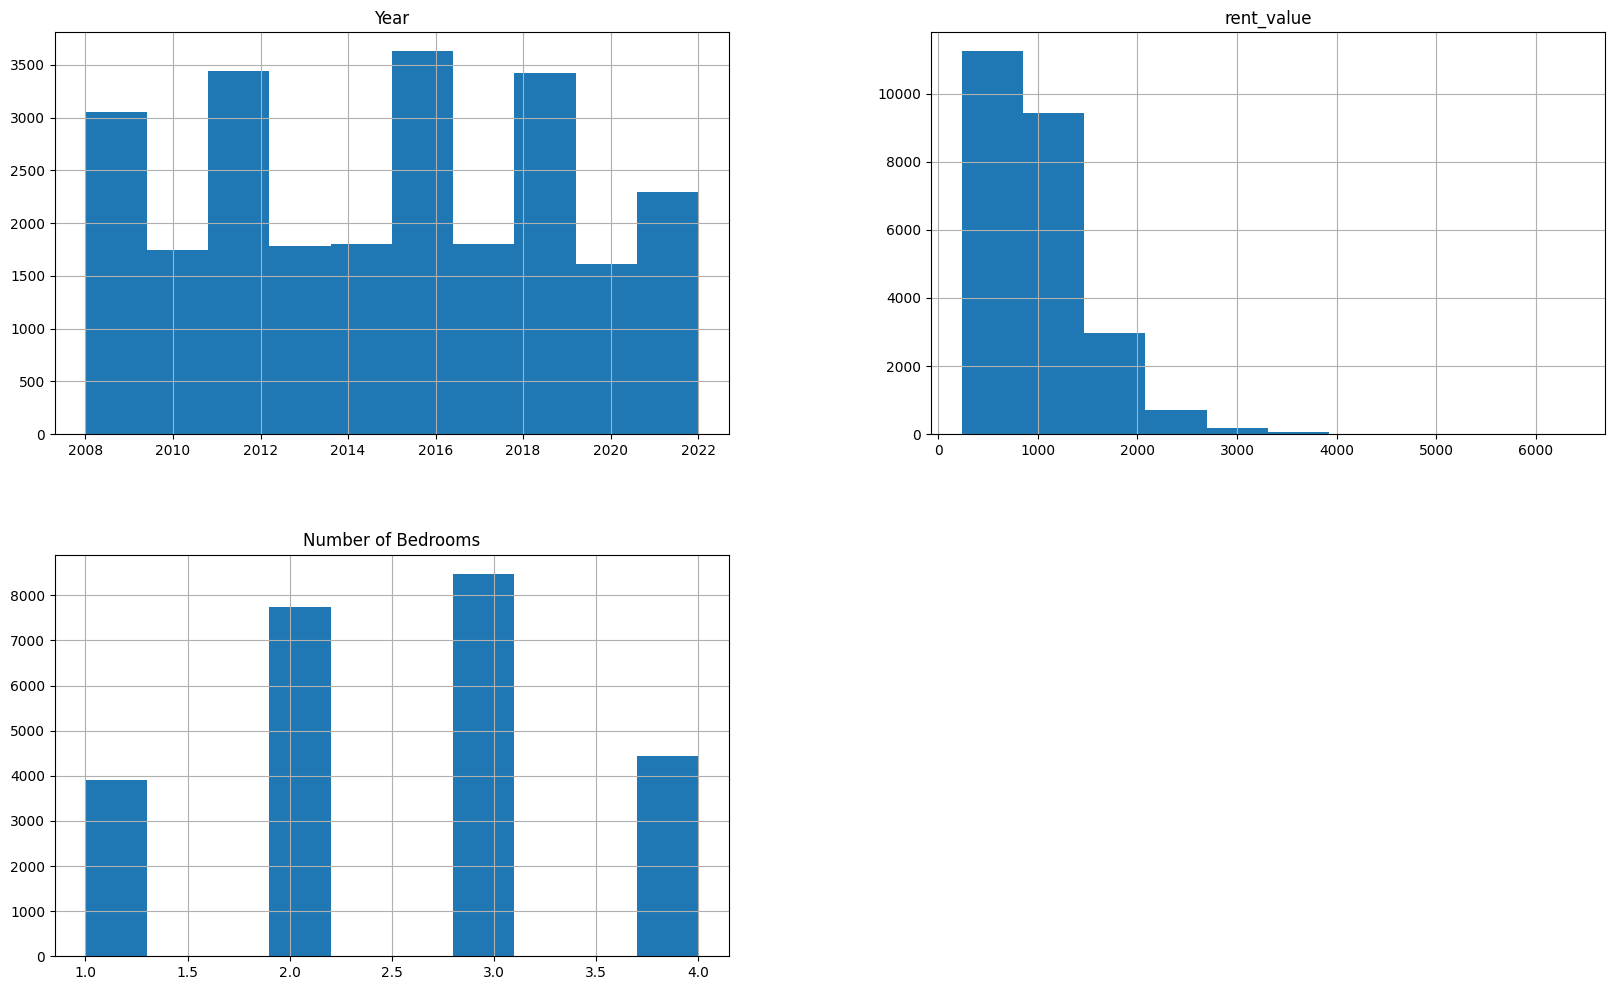

In [59]:
rent_df[['Year', 'rent_value', "Number of Bedrooms"]].hist(figsize=(20,12))

<Axes: >

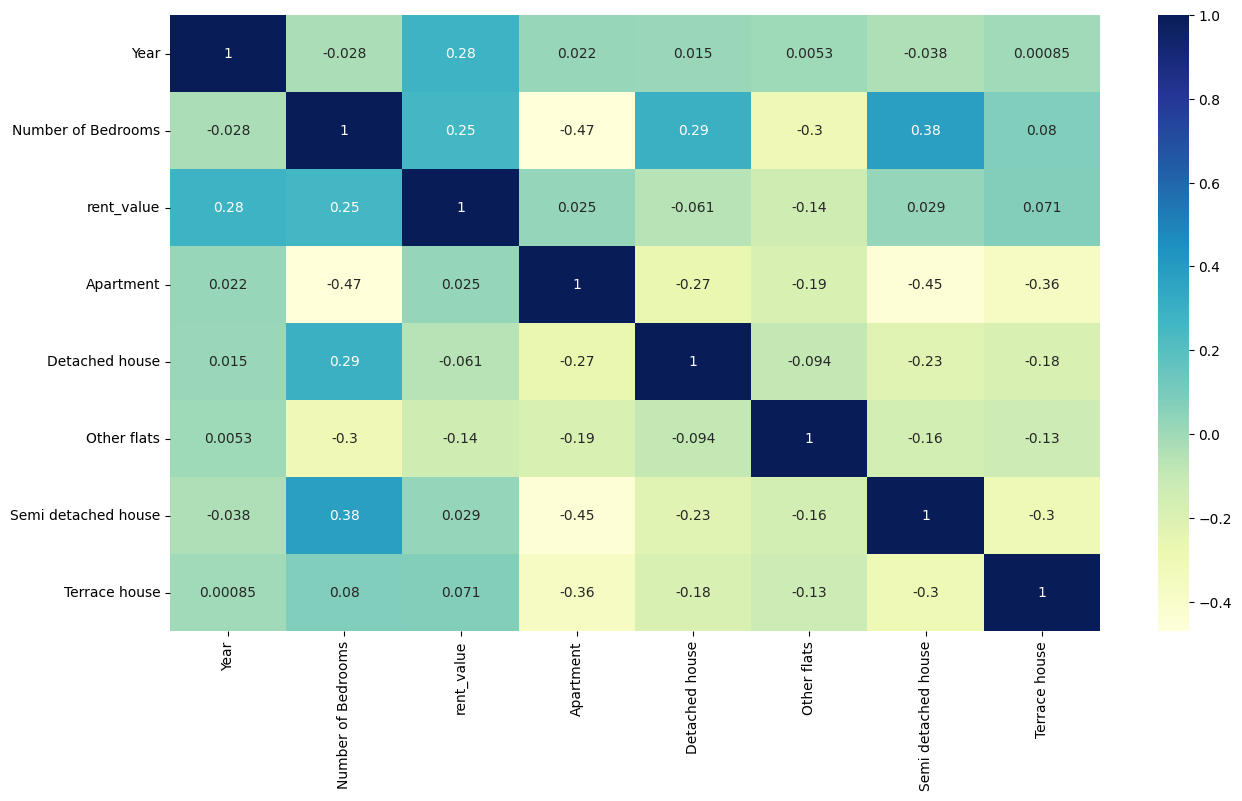

In [60]:
plt.figure(figsize= (15,8))
exp_rent_df = rent_df.select_dtypes(include='number')
sns.heatmap(exp_rent_df.corr(), annot=True, cmap= "YlGnBu")

#Exploratory Data Analysis - Disposable Income df

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'avg_disposable_income'}>]], dtype=object)

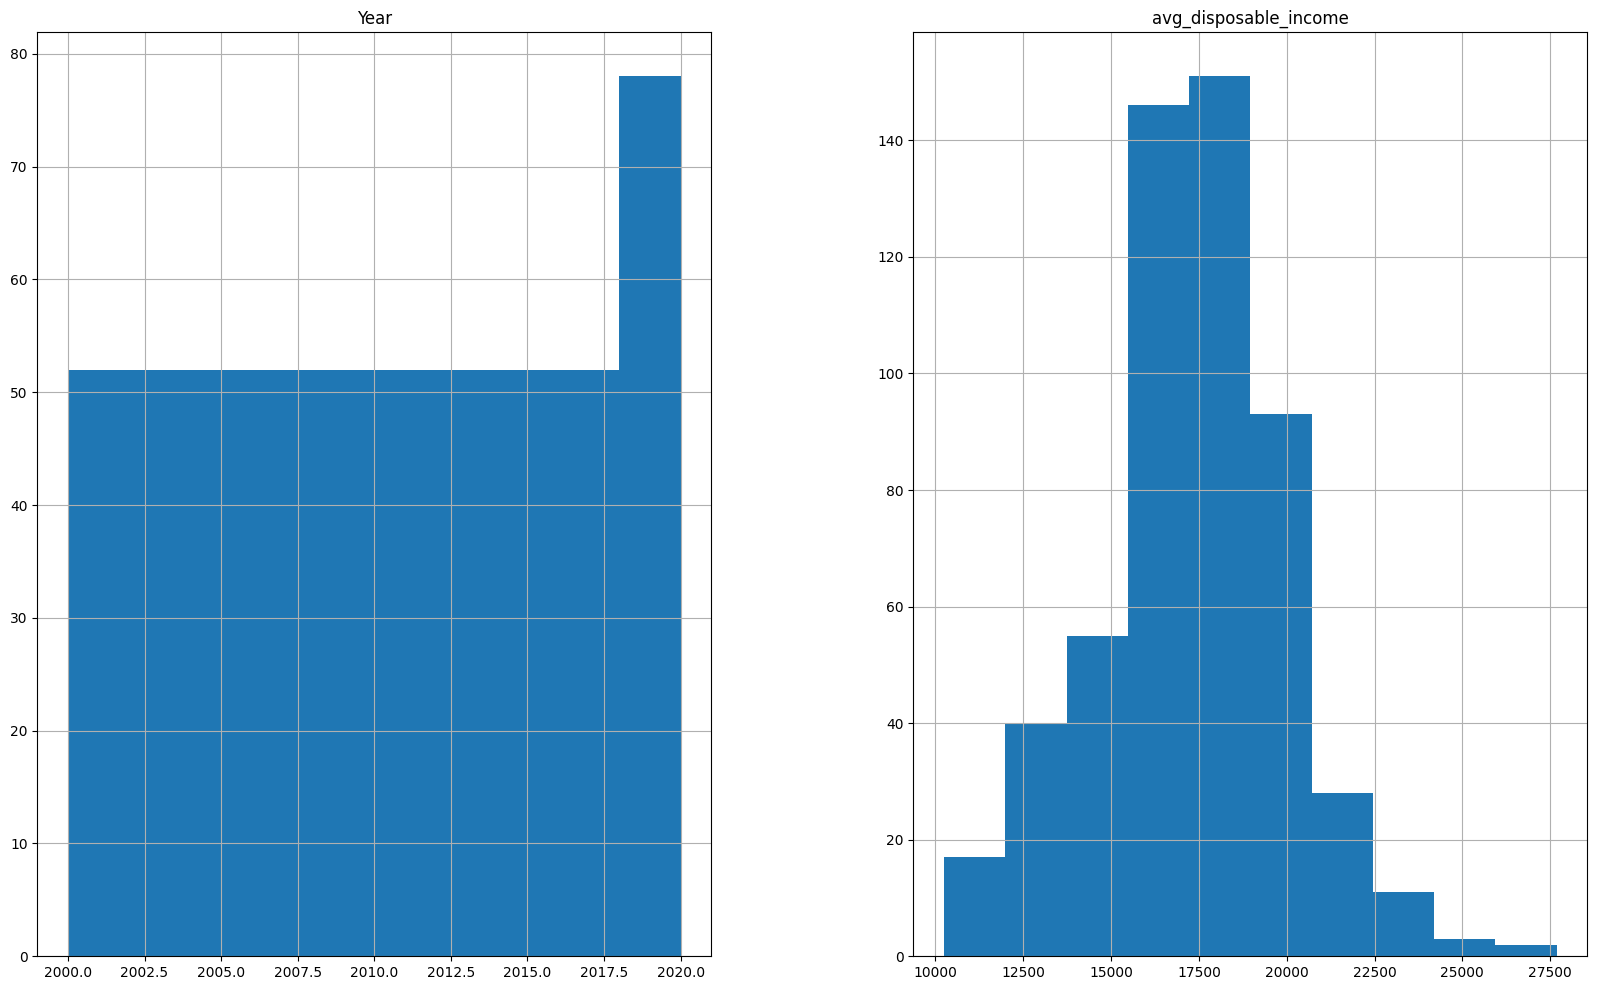

In [61]:
d_i_df.hist(figsize=(20,12))

<Axes: >

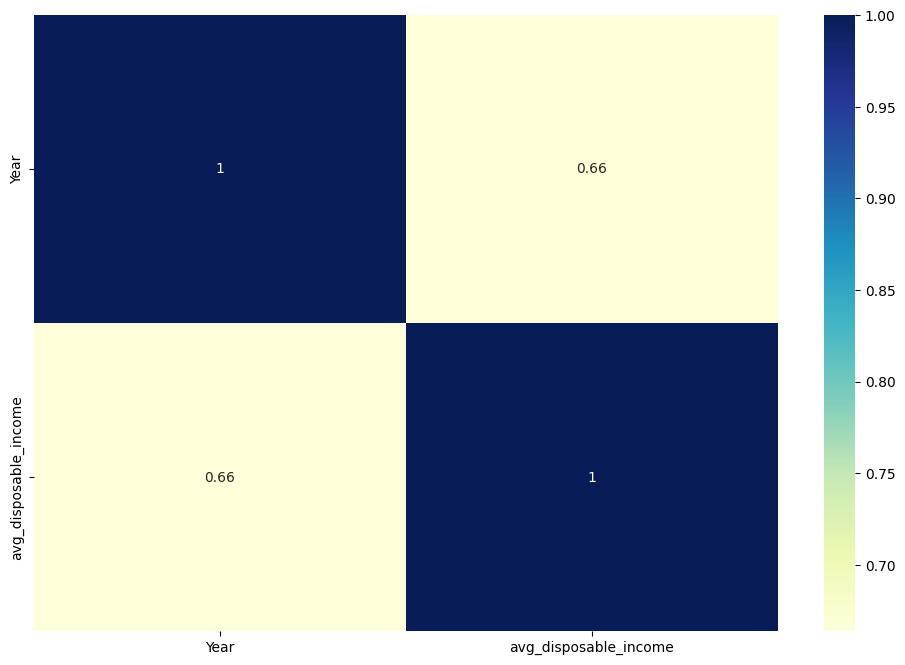

In [62]:
plt.figure(figsize= (12,8))
exp_d_i_df = d_i_df.select_dtypes(include='number')
sns.heatmap(exp_d_i_df.corr(), annot=True, cmap= "YlGnBu")

#Exploratory Data Analysis - House Purchases df

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'house_purchase_price'}>]], dtype=object)

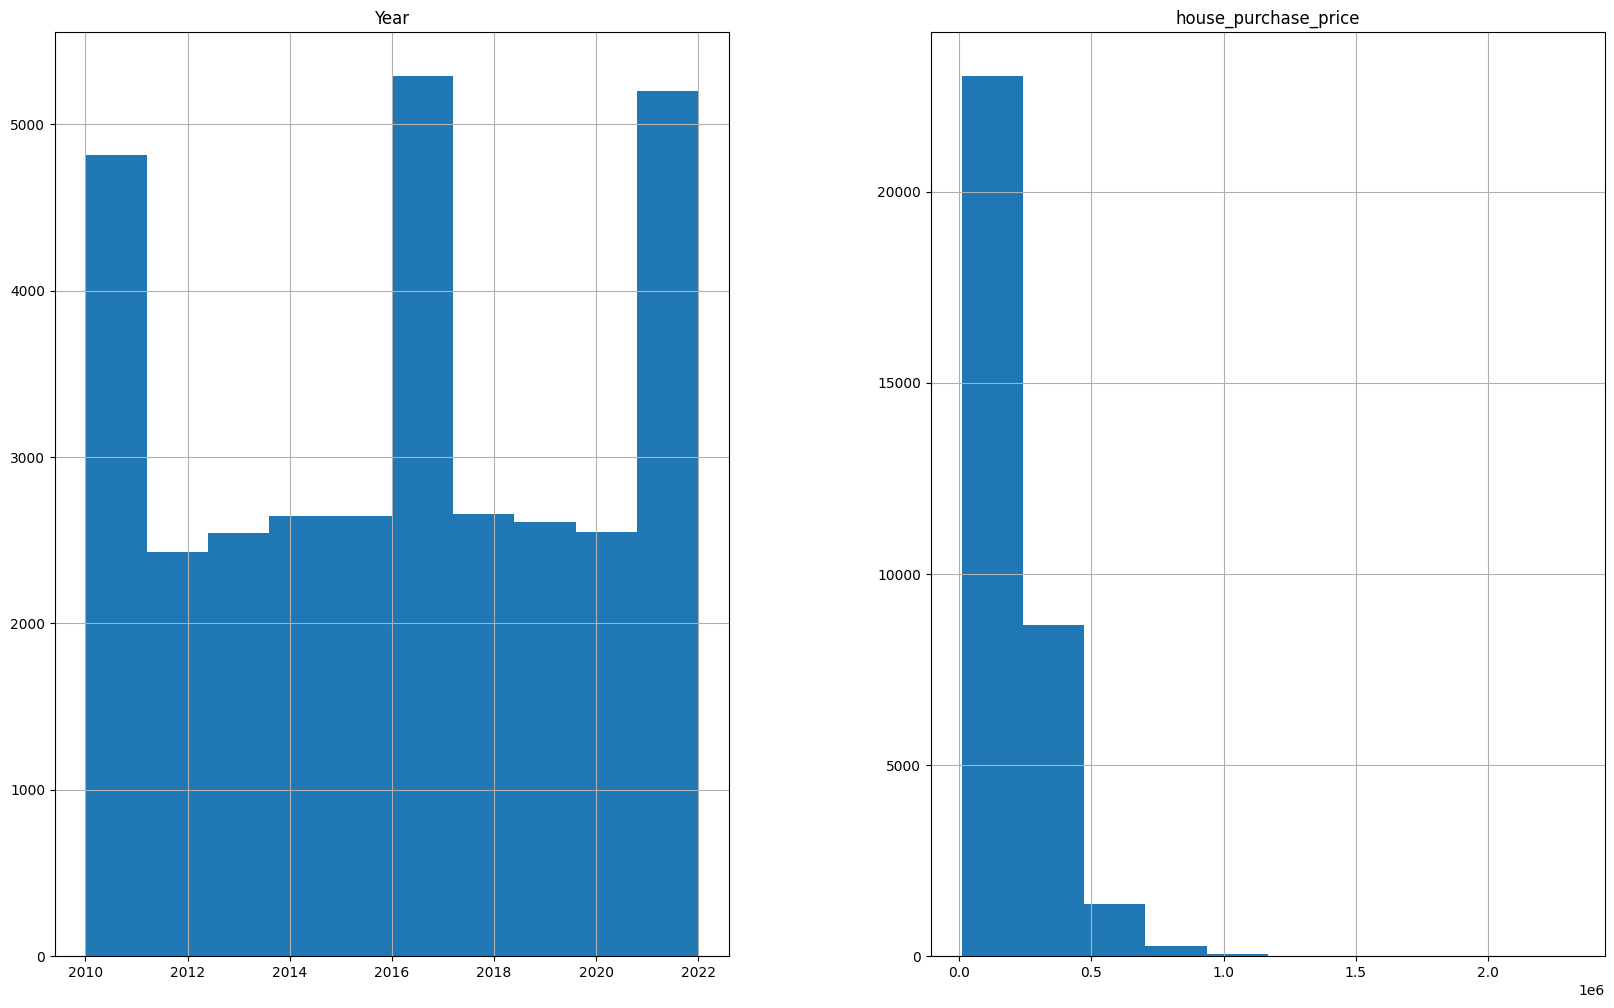

In [63]:
h_p_df.hist(figsize=(20,12))

<Axes: >

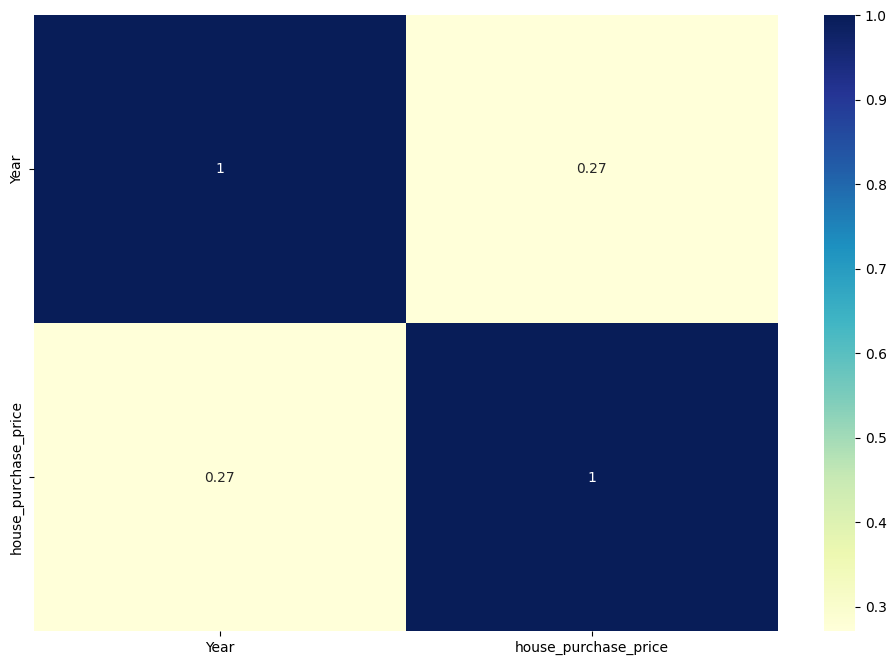

In [64]:
plt.figure(figsize= (12,8))
exp_h_p_df = h_p_df.select_dtypes(include='number')
sns.heatmap(exp_h_p_df.corr(), annot=True, cmap= "YlGnBu")

#Merging the dataframes into 1 dataframe

##Data preprocessing - combined df

In [65]:
cb_df = pd.merge(rent_df, d_i_df, on= ['Year', "region"])
cb_df = pd.merge(cb_df, h_p_df, on= ['Year', "region"])

In [66]:
cb_df

Year  Number of Bedrooms  rent_value      region  Apartment  \
0        2010                   1      591.15  South_West          0   
1        2010                   1      591.15  South_West          0   
2        2010                   1      591.15  South_West          0   
3        2010                   1      591.15  South_West          0   
4        2010                   1      591.15  South_West          0   
...       ...                 ...         ...         ...        ...   
4529589  2020                   4     1107.17     Midland          0   
4529590  2020                   4     1107.17     Midland          0   
4529591  2020                   4     1107.17     Midland          0   
4529592  2020                   4     1107.17     Midland          0   
4529593  2020                   4     1107.17     Midland          0   

         Detached house  Other flats  Semi detached house  Terrace house  \
0                     1            0                    0              0   
1                     1            0                    0              0   
2                     1            0                    0              0   
3                     1            0                    0              0   
4                     1            0                    0              0   
...                 ...          ...                  ...            ...   
4529589               0            0                    0              1   
4529590               0            0                    0              1   
4529591               0            0                    0              1   
4529592               0            0                    0              1   
4529593               0            0                    0              1   

         avg_disposable_income Type of Dwelling Dwelling Status  \
0                     19023.94        Apartment             New   
1                     19023.94        Apartment             New   
2                     19023.94        Apartment             New   
3                     19023.94        Apartment             New   
4                     19023.94        Apartment        Existing   
...                        ...              ...             ...   
4529589               19728.69            House        Existing   
4529590               19728.69            House        Existing   
4529591               19728.69            House        Existing   
4529592               19728.69            House        Existing   
4529593               19728.69            House        Existing   

        Stamp Duty Event  house_purchase_price  
0                Filings              324146.0  
1                Filings              232682.0  
2             Executions              448325.0  
3             Executions              280913.0  
4                Filings              160000.0  
...                  ...                   ...  
4529589          Filings              187878.0  
4529590       Executions              211325.0  
4529591       Executions              129422.0  
4529592       Executions              172851.0  
4529593       Executions              200901.0  

[4529594 rows x 14 columns]

In [67]:
cb_df = cb_df.drop("Type of Dwelling", axis = "columns")
cb_df = cb_df.drop("Dwelling Status", axis = "columns")
cb_df = cb_df.drop("Stamp Duty Event", axis = "columns")

In [68]:
cb_df.isna().sum()

Year                     0
Number of Bedrooms       0
rent_value               0
region                   0
Apartment                0
Detached house           0
Other flats              0
Semi detached house      0
Terrace house            0
avg_disposable_income    0
house_purchase_price     0
dtype: int64

##Sample of the dataset taken

The full combined dataset is too large to be combined with the crime dataset (not enough RAM in my device) so a sample will be taken

In [69]:
#The merged dataset is too large, so a sample is taken
cb_sample_df = cb_df.sample(frac=0.01)

In [70]:
cb_sample_df = cb_sample_df.sort_values('Year')

In [71]:
crime_df_2 = crime_df_2.drop(['Type of Offence'], axis=1)

In [72]:
crime_df_2 = crime_df.groupby(["Year", "region"])["Number_of_Crimes"].sum().reset_index()

In [73]:
cb_df['Year'].dtypes

dtype('int64')

In [74]:
crime_df_2['Year'].dtypes

dtype('O')

In [75]:
crime_df_2["Year"] = crime_df_2["Year"].astype(int)

In [76]:
crime_df_2

Year      region  Number_of_Crimes
0    2003      Border             32360
1    2003      Dublin            190767
2    2003    Mid_East             50262
3    2003    Mid_West             40431
4    2003     Midland             18765
..    ...         ...               ...
155  2022    Mid_West             26623
156  2022     Midland             15401
157  2022  South_East             23564
158  2022  South_West             29304
159  2022        West             20137

[160 rows x 3 columns]

In [77]:
cb_sample_df = pd.merge(cb_sample_df, crime_df_2, on= ['Year', "region"])

In [78]:
cb_sample_df

Year  Number of Bedrooms  rent_value      region  Apartment  \
0      2010                   3      758.61  South_West          0   
1      2010                   3      865.53  South_West          1   
2      2010                   4      923.19  South_West          0   
3      2010                   1      488.50  South_West          1   
4      2010                   3      721.60  South_West          0   
...     ...                 ...         ...         ...        ...   
45291  2020                   1      775.77  South_West          0   
45292  2020                   4     1611.05  South_West          0   
45293  2020                   3     1148.92  South_West          0   
45294  2020                   4      870.45  South_West          0   
45295  2020                   1      888.97  South_West          0   

       Detached house  Other flats  Semi detached house  Terrace house  \
0                   0            0                    1              0   
1                   0            0                    0              0   
2                   1            0                    0              0   
3                   0            0                    0              0   
4                   1            0                    0              0   
...               ...          ...                  ...            ...   
45291               1            0                    0              0   
45292               0            0                    0              1   
45293               0            0                    0              1   
45294               1            0                    0              0   
45295               0            0                    0              1   

       avg_disposable_income  house_purchase_price  Number_of_Crimes  
0                   16606.73              209996.0             52341  
1                   19023.94              280913.0             52341  
2                   19023.94              242048.0             52341  
3                   16606.73              270829.0             52341  
4                   16606.73              320861.0             52341  
...                      ...                   ...               ...  
45291               23855.61              243287.0             33177  
45292               23855.61              194200.0             33177  
45293               23855.61              390000.0             33177  
45294               23855.61              183000.0             33177  
45295               20462.13              359226.0             33177  

[45296 rows x 12 columns]

In [79]:
#cb_sample_df.drop_duplicates()

In [80]:
#cb_sample_df['Type of Offence'].unique()
#cb_sample_df['Type of Offence'].nunique()

<>

creating a df with an equal amount of rows for each year

In [81]:
samples = []
for year in cb_sample_df['Year'].unique():
    s = cb_sample_df.loc[cb_sample_df['Year']== year].sample(n=1200).reset_index(drop=True)
    samples.append(s)

equal_sample_df = pd.concat(samples, axis=0)

#cb_sample_df['Year'].sample(n=3500)
#for year in cb_sample_df['Year']:
 # cb_sample_df = cb_sample_df['Year'].sample(n=350000)

In [82]:
S_yr_counts = equal_sample_df['Year'].value_counts()
S_yr_counts

Year
2010    1200
2011    1200
2012    1200
2013    1200
2014    1200
2015    1200
2016    1200
2017    1200
2018    1200
2019    1200
2020    1200
Name: count, dtype: int64

In [83]:
equal_sample_df.head()

Year  Number of Bedrooms  rent_value    region  Apartment  Detached house  \
0  2010                   1      471.30  Mid_West          0               0   
1  2010                   4     1114.57  Mid_East          0               0   
2  2010                   3      584.69   Midland          0               0   
3  2010                   3      655.23      West          0               1   
4  2010                   2      774.66  Mid_East          0               0   

   Other flats  Semi detached house  Terrace house  avg_disposable_income  \
0            0                    1              0               18141.53   
1            0                    1              0               19246.63   
2            0                    0              1               17733.34   
3            0                    0              0               17595.60   
4            0                    1              0               17506.12   

   house_purchase_price  Number_of_Crimes  
0              202531.0             52831  
1              232876.0             66880  
2              144833.0             23440  
3              490000.0             39147  
4              331210.0             66880

#Exploratory Data Analaysis - Combined df

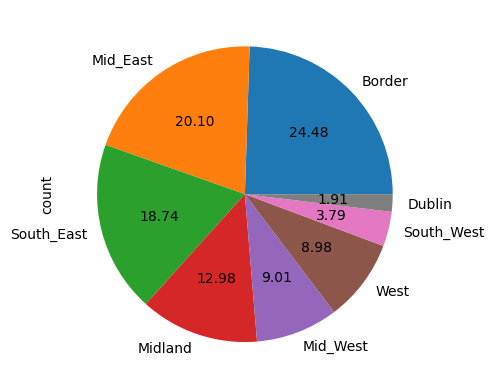

In [84]:
equal_sample_df['region'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

<Axes: xlabel='rent_value', ylabel='Number_of_Crimes'>

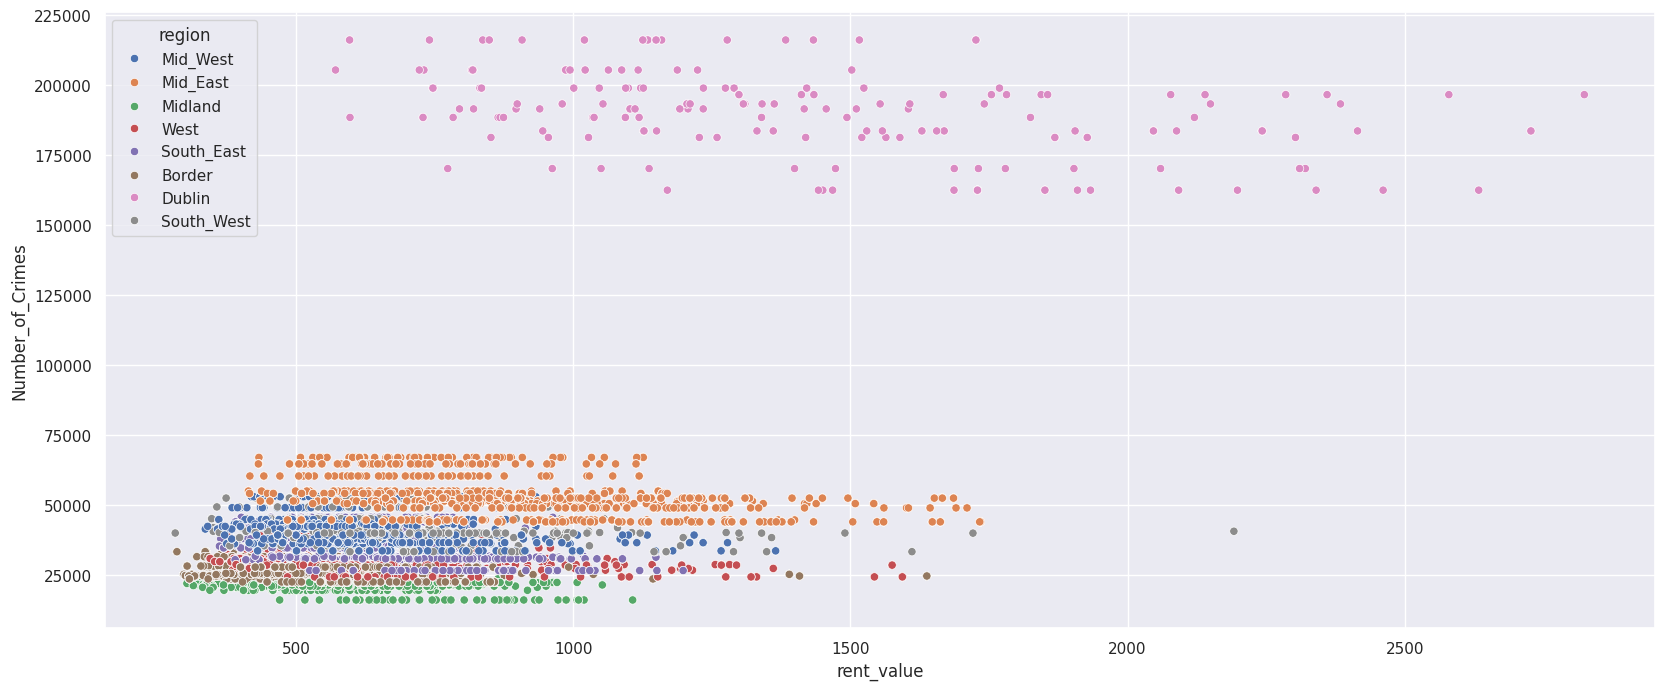

In [85]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

sns.scatterplot(x=equal_sample_df['rent_value'],y=equal_sample_df['Number_of_Crimes'], hue=equal_sample_df['region'])


<Axes: xlabel='house_purchase_price', ylabel='Number_of_Crimes'>

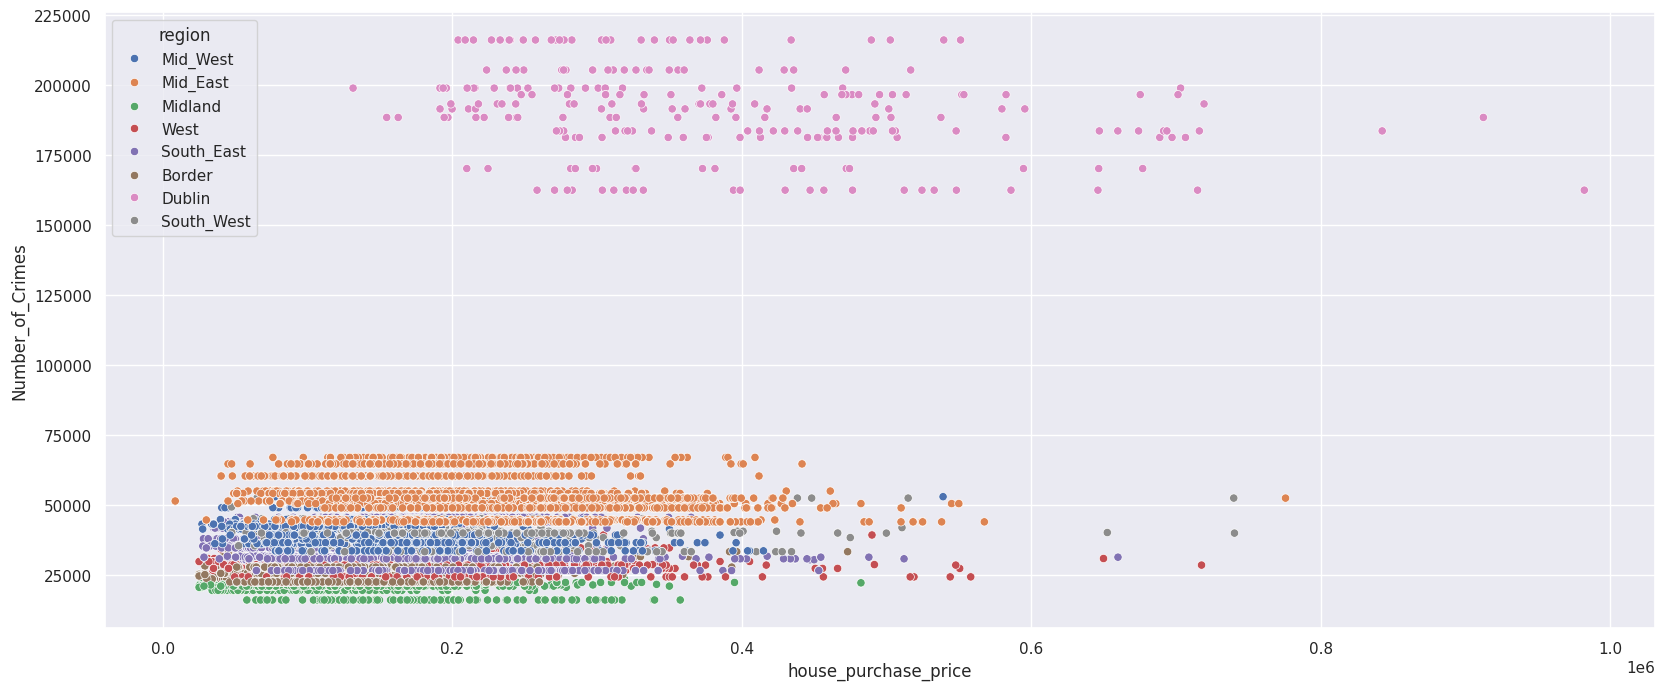

In [86]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

sns.scatterplot(x=equal_sample_df['house_purchase_price'],y=equal_sample_df['Number_of_Crimes'], hue=equal_sample_df['region'])

In [87]:
result = equal_sample_df.loc[(equal_sample_df['house_purchase_price'] > 2000000)]
print(result)

Empty DataFrame
Columns: [Year, Number of Bedrooms, rent_value, region, Apartment, Detached house, Other flats, Semi detached house, Terrace house, avg_disposable_income, house_purchase_price, Number_of_Crimes]
Index: []


Removing outlier discovered in graph above

In [88]:
equal_sample_df_scattter = equal_sample_df.drop(equal_sample_df[equal_sample_df['house_purchase_price'] > 2000000].index)

In [89]:
#equal_sample_df_scattter

<Axes: xlabel='house_purchase_price', ylabel='Number_of_Crimes'>

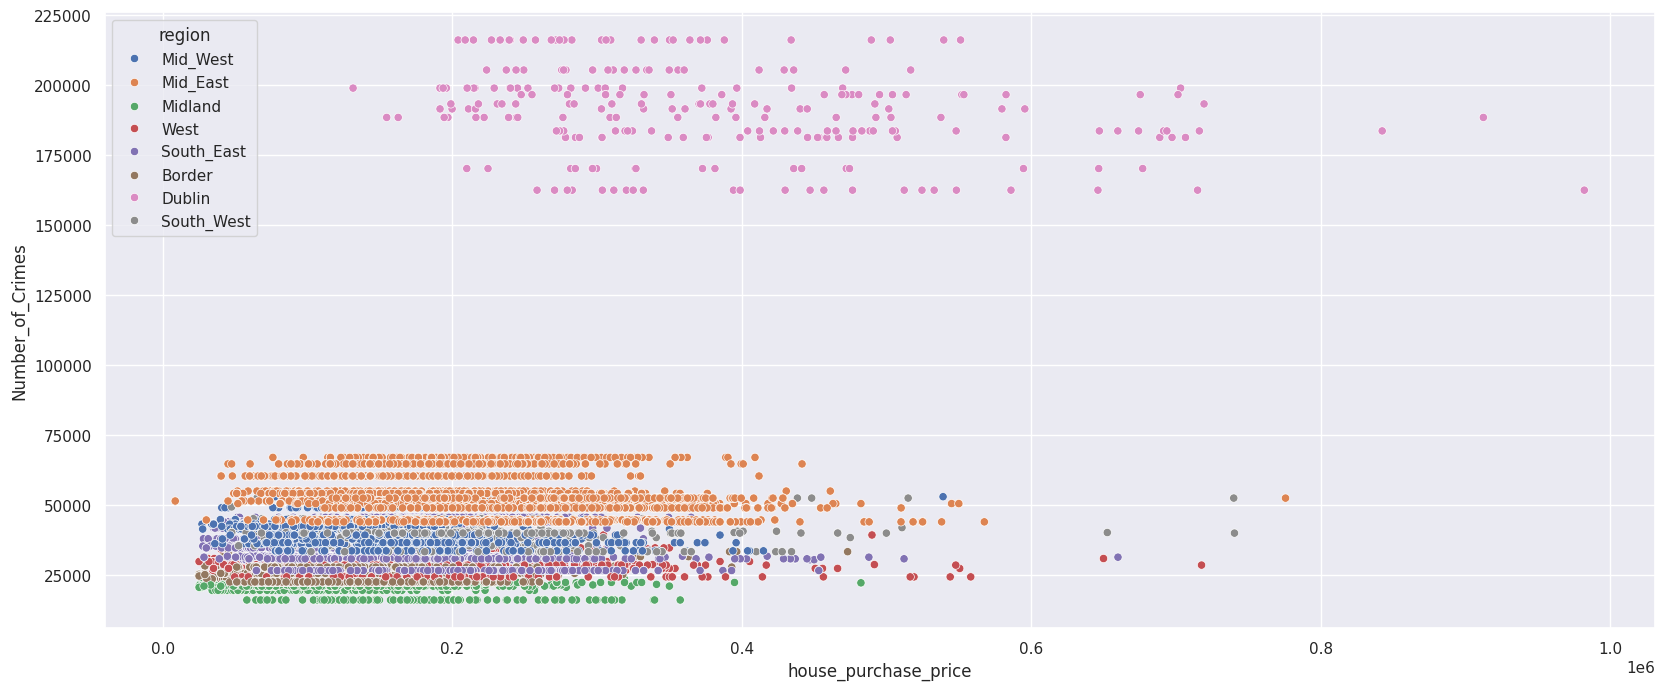

In [90]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

sns.scatterplot(x=equal_sample_df_scattter['house_purchase_price'],y=equal_sample_df_scattter['Number_of_Crimes'], hue=equal_sample_df_scattter['region'])

In [91]:
cb_sample_df

Year  Number of Bedrooms  rent_value      region  Apartment  \
0      2010                   3      758.61  South_West          0   
1      2010                   3      865.53  South_West          1   
2      2010                   4      923.19  South_West          0   
3      2010                   1      488.50  South_West          1   
4      2010                   3      721.60  South_West          0   
...     ...                 ...         ...         ...        ...   
45291  2020                   1      775.77  South_West          0   
45292  2020                   4     1611.05  South_West          0   
45293  2020                   3     1148.92  South_West          0   
45294  2020                   4      870.45  South_West          0   
45295  2020                   1      888.97  South_West          0   

       Detached house  Other flats  Semi detached house  Terrace house  \
0                   0            0                    1              0   
1                   0            0                    0              0   
2                   1            0                    0              0   
3                   0            0                    0              0   
4                   1            0                    0              0   
...               ...          ...                  ...            ...   
45291               1            0                    0              0   
45292               0            0                    0              1   
45293               0            0                    0              1   
45294               1            0                    0              0   
45295               0            0                    0              1   

       avg_disposable_income  house_purchase_price  Number_of_Crimes  
0                   16606.73              209996.0             52341  
1                   19023.94              280913.0             52341  
2                   19023.94              242048.0             52341  
3                   16606.73              270829.0             52341  
4                   16606.73              320861.0             52341  
...                      ...                   ...               ...  
45291               23855.61              243287.0             33177  
45292               23855.61              194200.0             33177  
45293               23855.61              390000.0             33177  
45294               23855.61              183000.0             33177  
45295               20462.13              359226.0             33177  

[45296 rows x 12 columns]

<Axes: xlabel='house_purchase_price', ylabel='avg_disposable_income'>

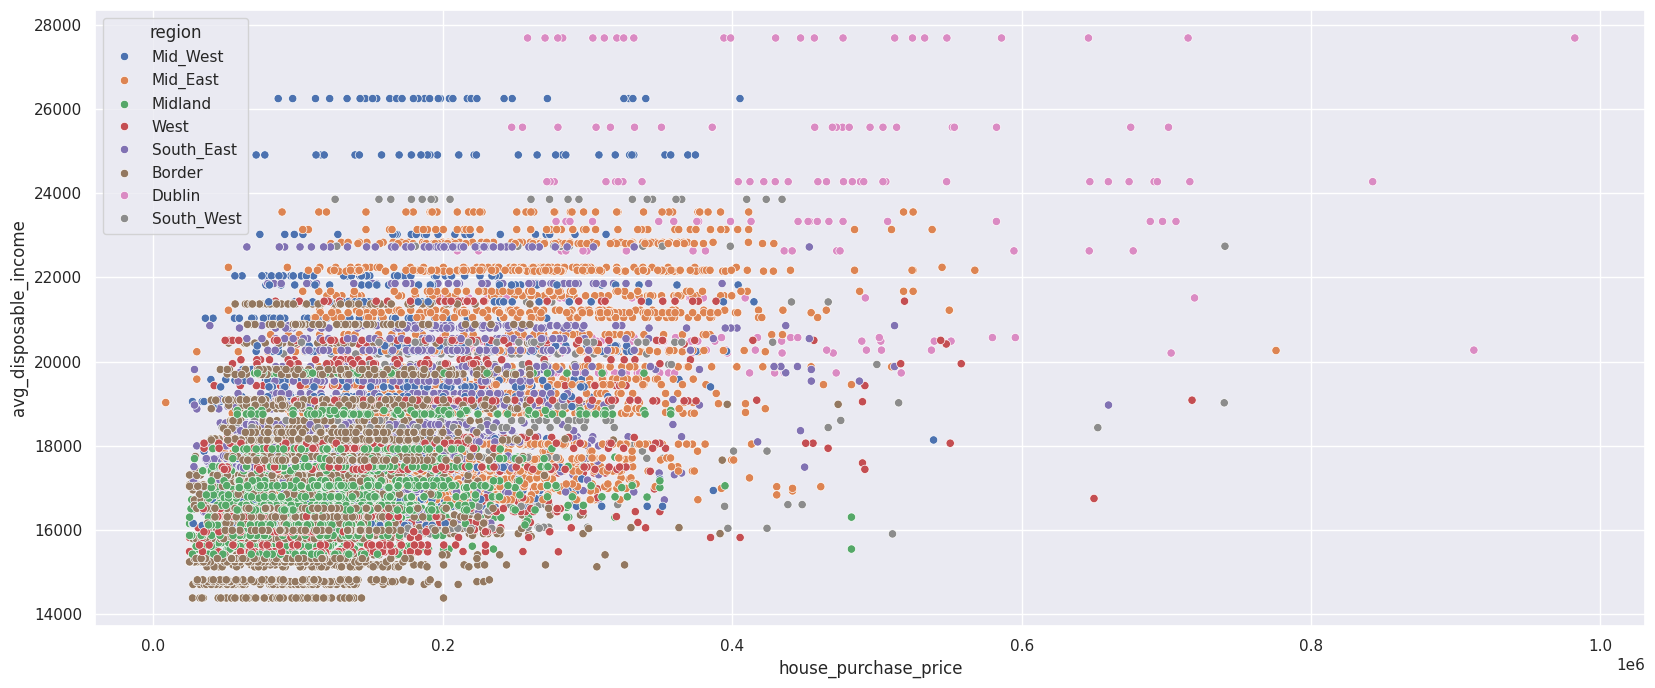

In [92]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

sns.scatterplot(x=equal_sample_df_scattter['house_purchase_price'],y=equal_sample_df_scattter['avg_disposable_income'], hue=equal_sample_df_scattter['region'])

The graph below shows the trend line of the graph above

<Axes: xlabel='house_purchase_price', ylabel='avg_disposable_income'>

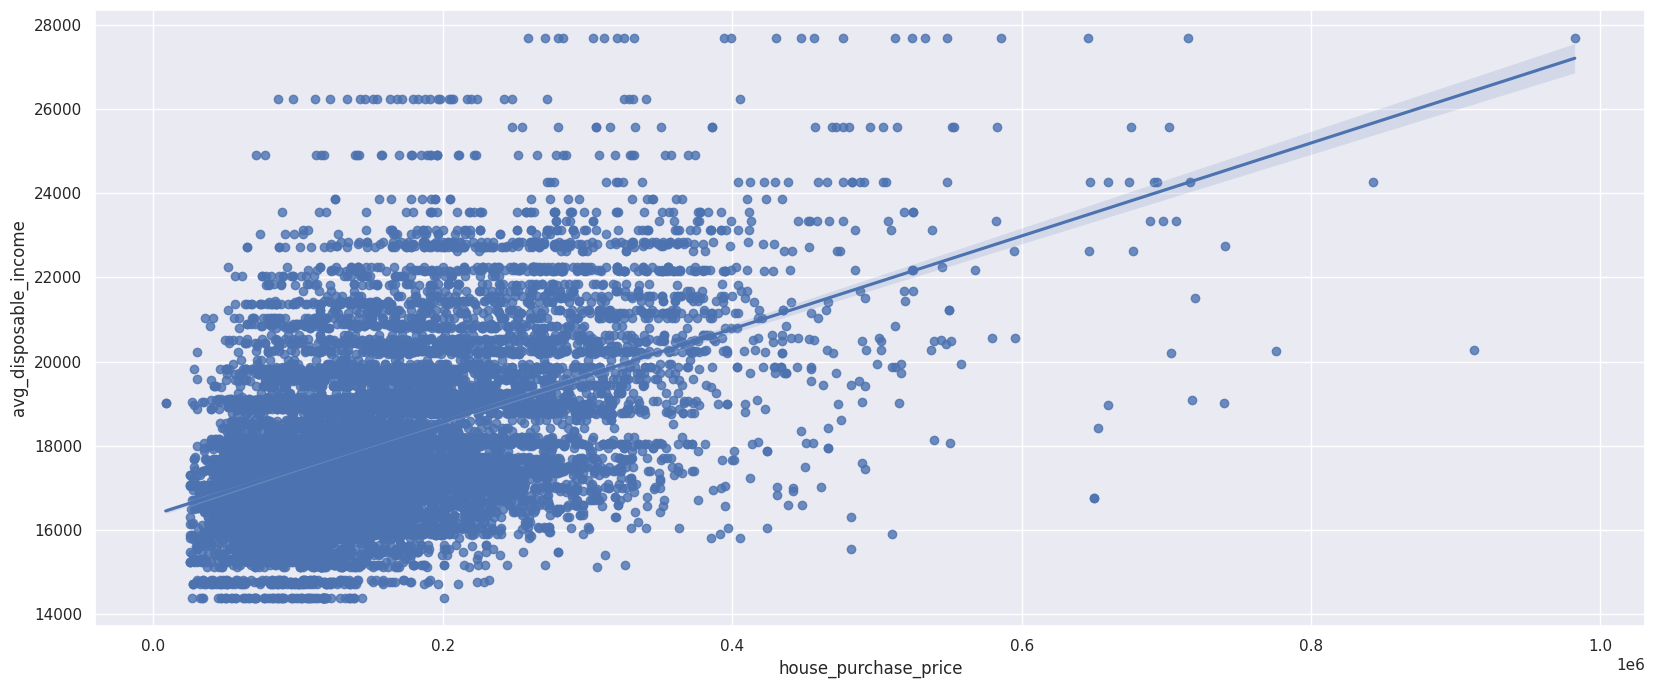

In [93]:
#sns.regplot(x = "x", y = "y",
#           hue = "group", data = df)

width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

sns.regplot(x=equal_sample_df_scattter['house_purchase_price'],y=equal_sample_df_scattter['avg_disposable_income'])

<Axes: xlabel='rent_value', ylabel='avg_disposable_income'>

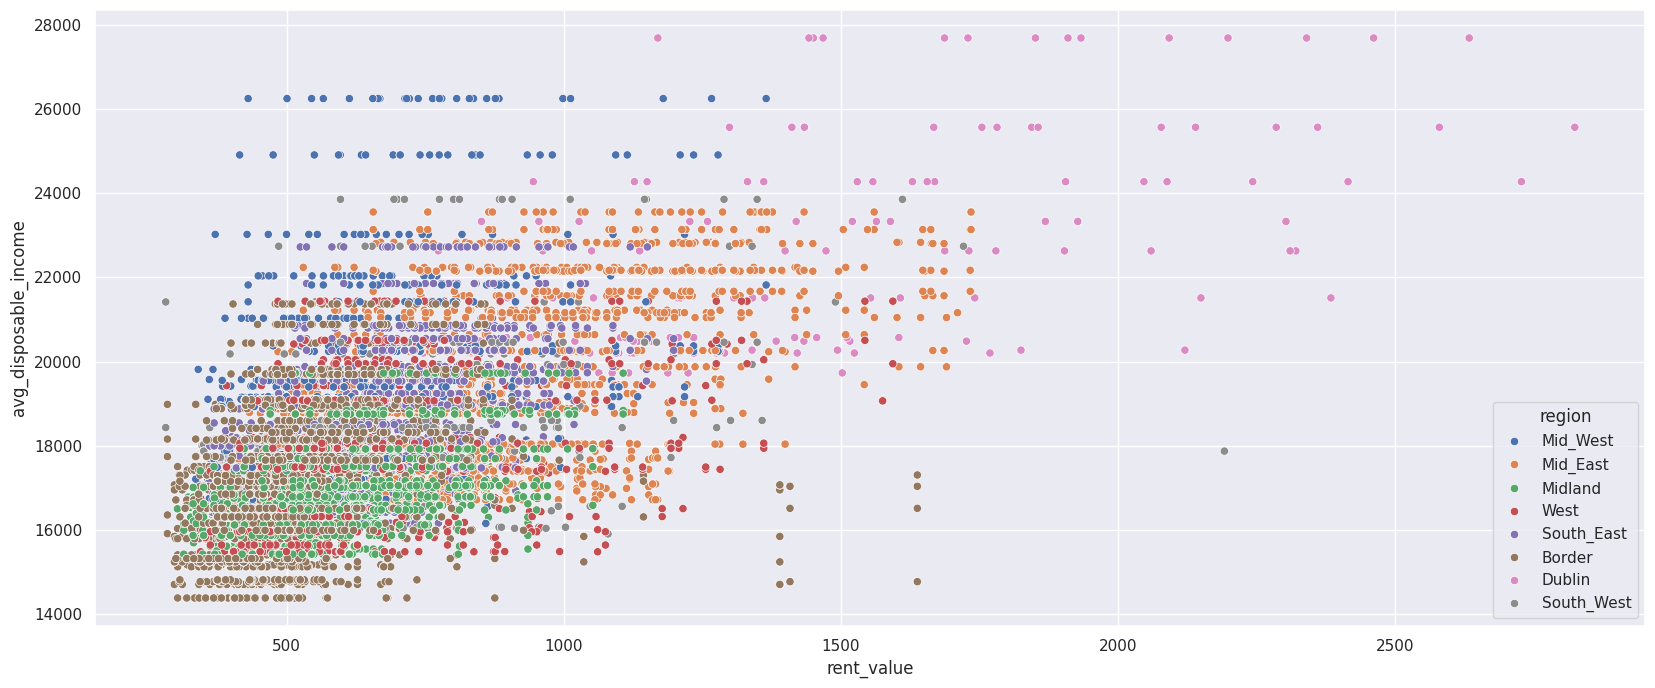

In [94]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

sns.scatterplot(x=equal_sample_df_scattter['rent_value'],y=equal_sample_df_scattter['avg_disposable_income'], hue=equal_sample_df_scattter['region'])

<Axes: xlabel='rent_value', ylabel='avg_disposable_income'>

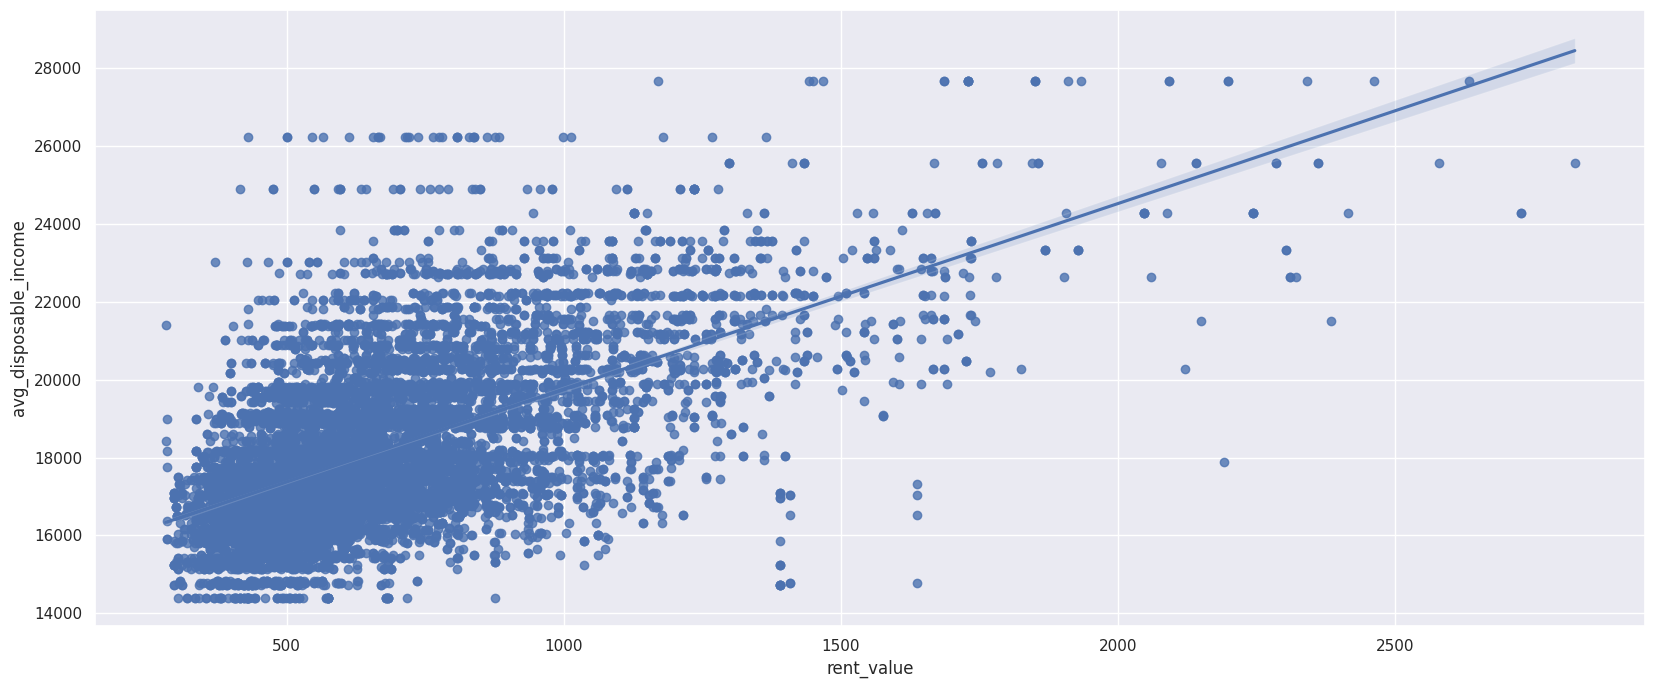

In [95]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

sns.regplot(x=equal_sample_df_scattter['rent_value'],y=equal_sample_df_scattter['avg_disposable_income'])

In [96]:
#width = 20
#height = 16
#sns.set(rc = {'figure.figsize':(width, height)})

#sns.scatterplot(x=equal_sample_df['Number_of_Crimes'],y=equal_sample_df['Type of Offence'], hue=equal_sample_df['region'])

In [97]:
yr_counts = cb_df['Year'].value_counts()

yr_counts
#taking the same number of values for each year:
#for i in range(37000):


Year
2015    440616
2018    439723
2017    436702
2014    434789
2016    433232
2019    415510
2013    409126
2020    399923
2010    374425
2012    372906
2011    372642
Name: count, dtype: int64

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Number of Bedrooms'}>,
        <Axes: title={'center': 'rent_value'}>],
       [<Axes: title={'center': 'Apartment'}>,
        <Axes: title={'center': 'Detached house'}>,
        <Axes: title={'center': 'Other flats'}>],
       [<Axes: title={'center': 'Semi detached house'}>,
        <Axes: title={'center': 'Terrace house'}>,
        <Axes: title={'center': 'avg_disposable_income'}>],
       [<Axes: title={'center': 'house_purchase_price'}>,
        <Axes: title={'center': 'Number_of_Crimes'}>, <Axes: >]],
      dtype=object)

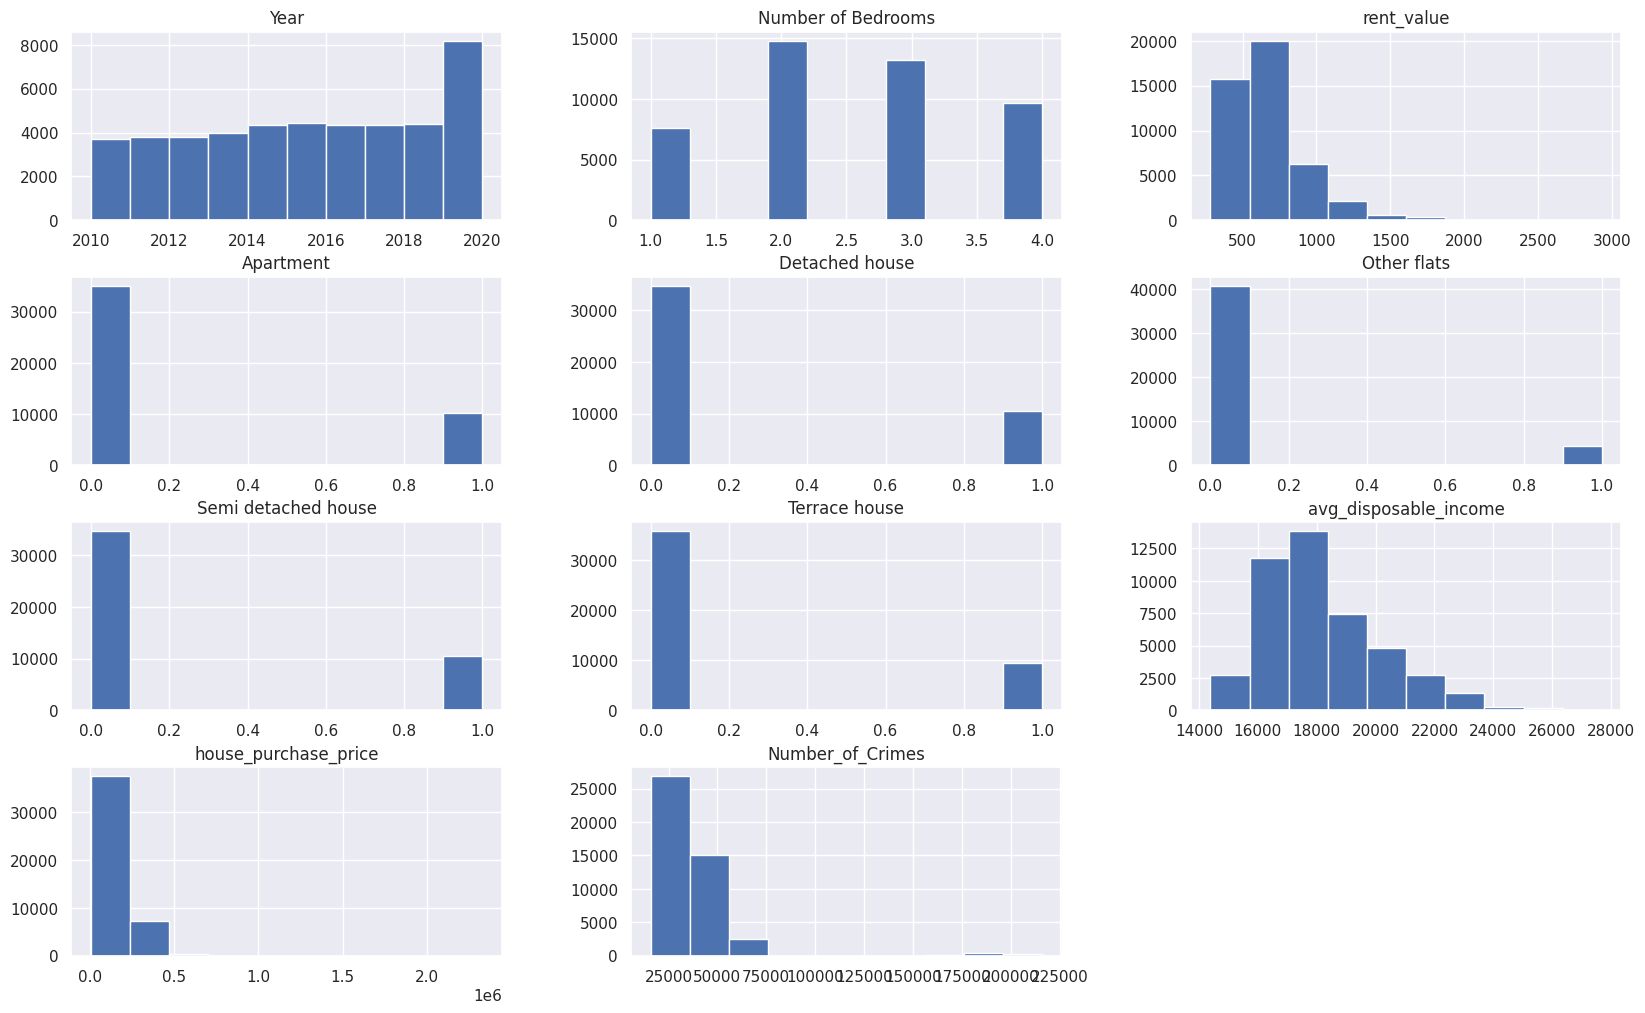

In [98]:
cb_sample_df.hist(figsize=(20,12))

####combined df - converting regions into dummy variables

In [99]:
cb_sample_df = cb_sample_df.join(pd.get_dummies(cb_sample_df["region"])).drop(["region"], axis=1)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'rent_value'}>],
       [<Axes: title={'center': 'Number of Bedrooms'}>,
        <Axes: title={'center': 'avg_disposable_income'}>],
       [<Axes: title={'center': 'house_purchase_price'}>, <Axes: >]],
      dtype=object)

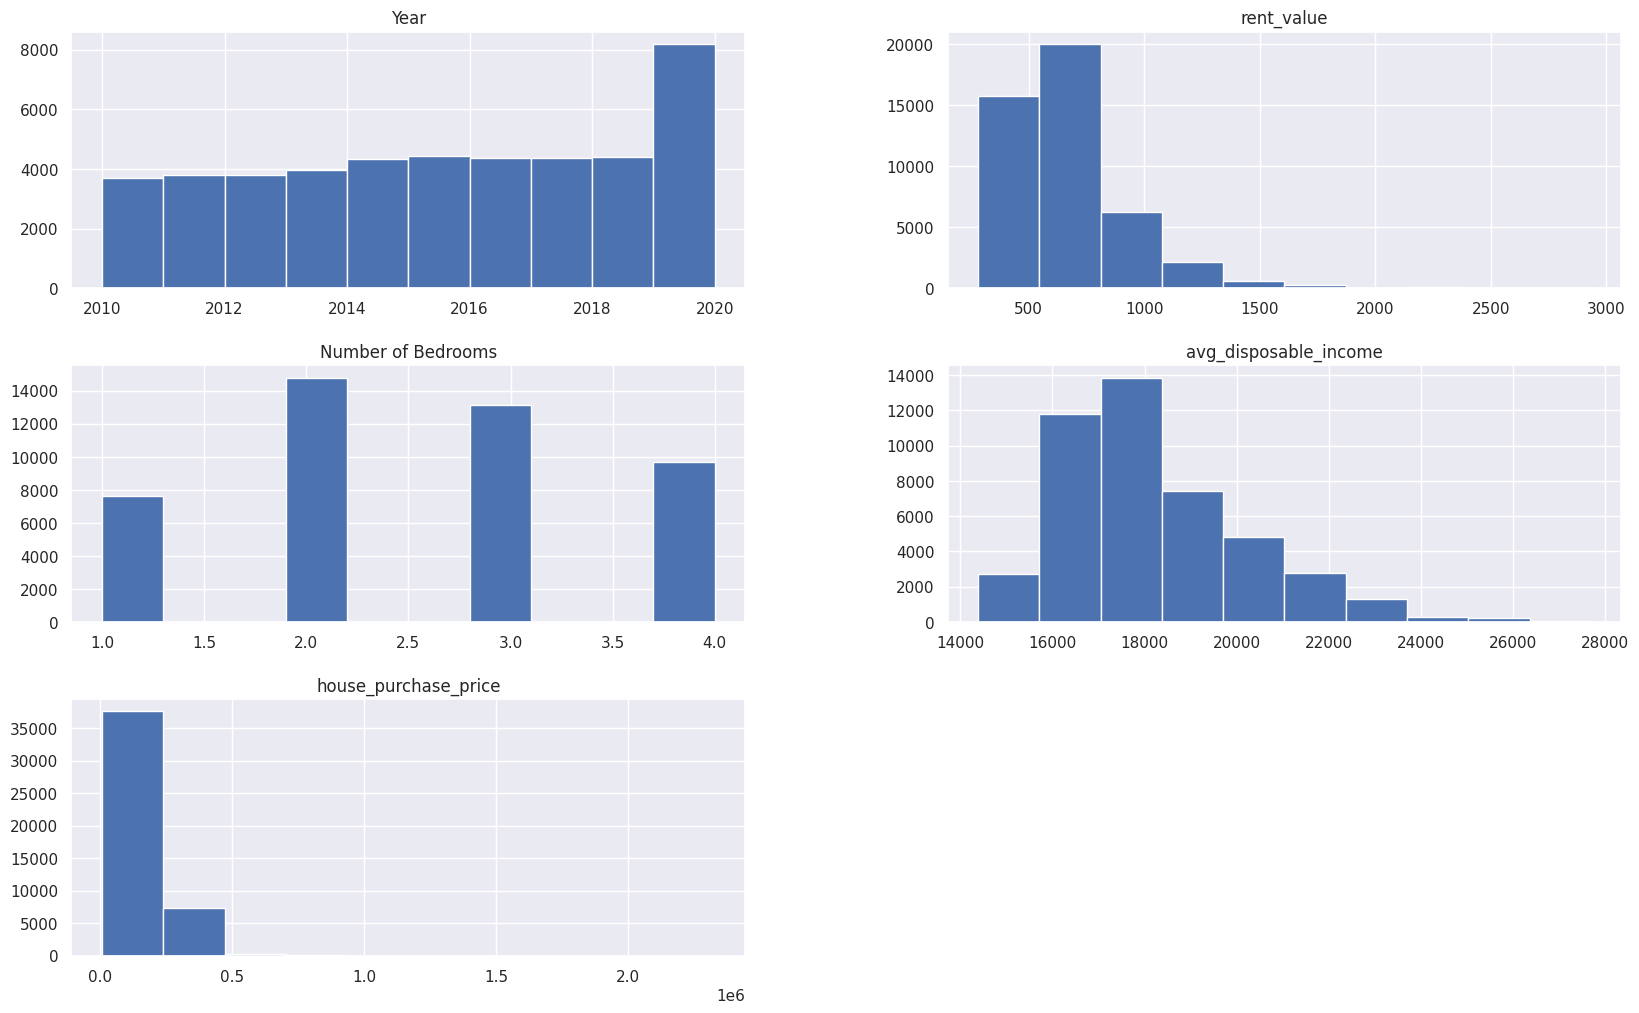

In [100]:
cb_sample_df[['Year', 'rent_value', 'Number of Bedrooms', 'avg_disposable_income', 'house_purchase_price']].hist(figsize=(20,12))

<Axes: >

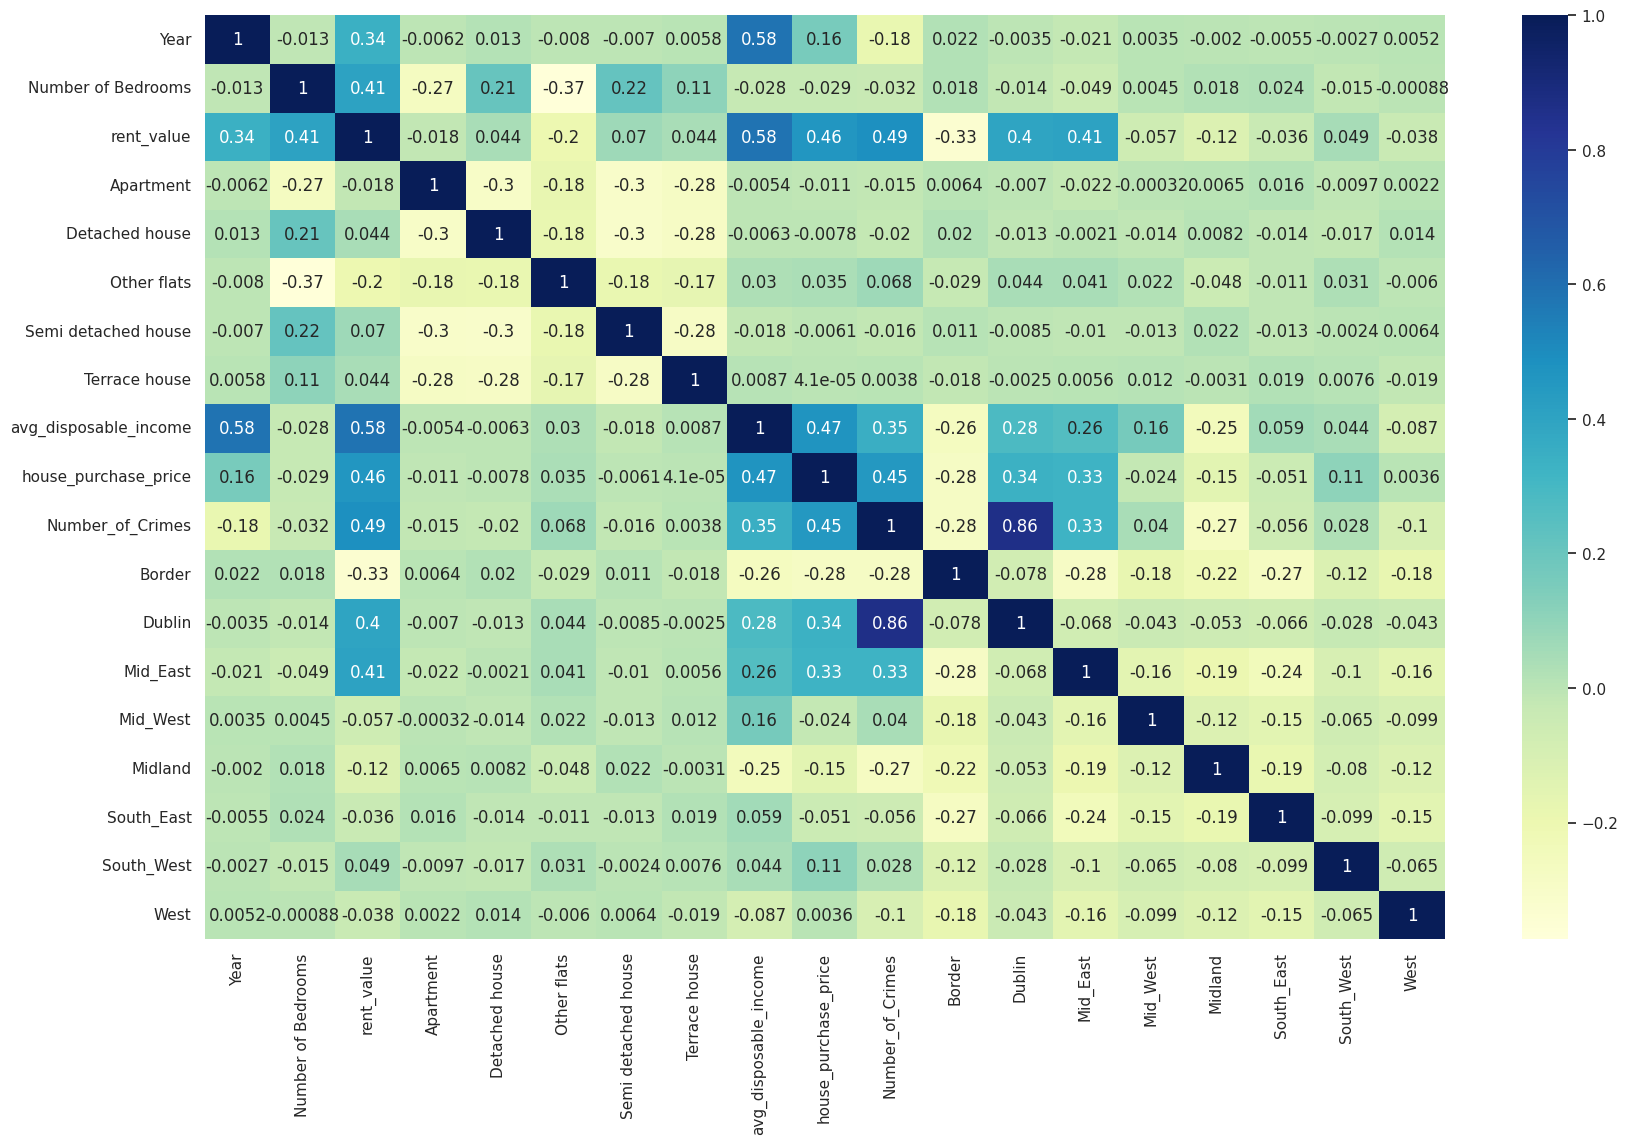

In [101]:
plt.figure(figsize= (20,12))
sns.heatmap(cb_sample_df.corr(), annot=True, cmap= "YlGnBu")

#line plots visualizing the house price and rent price data

<Axes: xlabel='Year'>

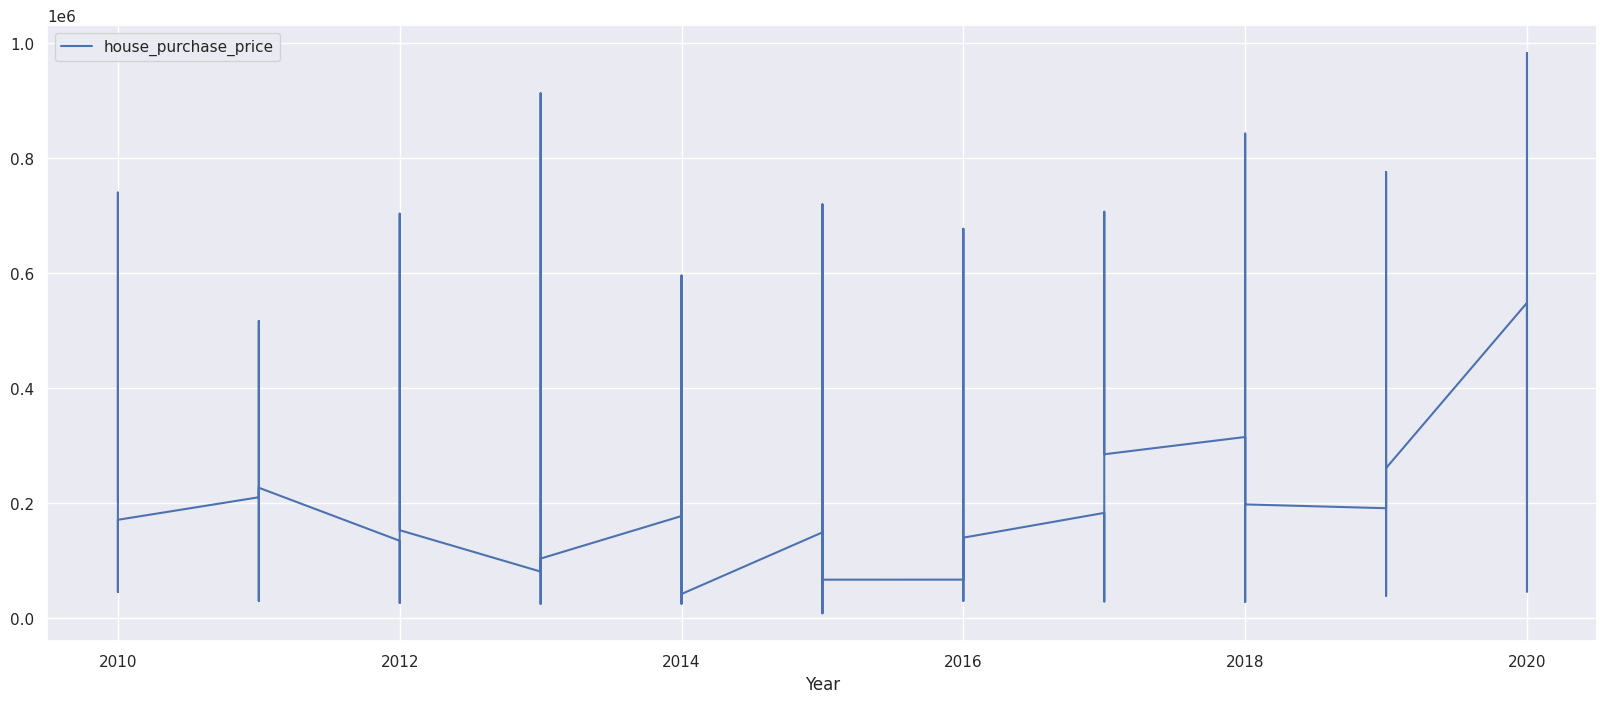

In [102]:
equal_sample_df.plot.line(x = "Year", y = "house_purchase_price", use_index = True)

<Axes: xlabel='Year'>

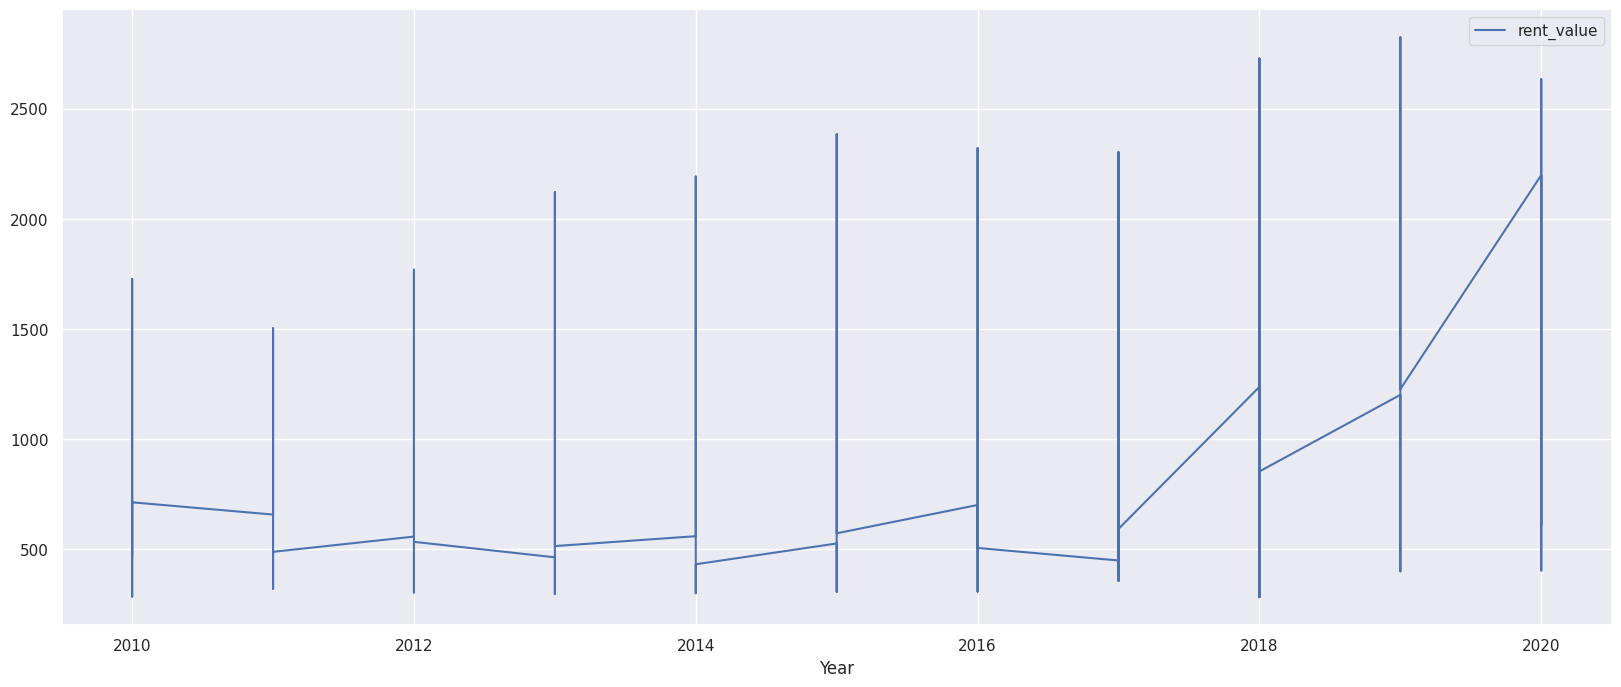

In [103]:
equal_sample_df.plot.line(x = "Year", y = "rent_value", use_index = True)

<Axes: xlabel='Number_of_Crimes'>

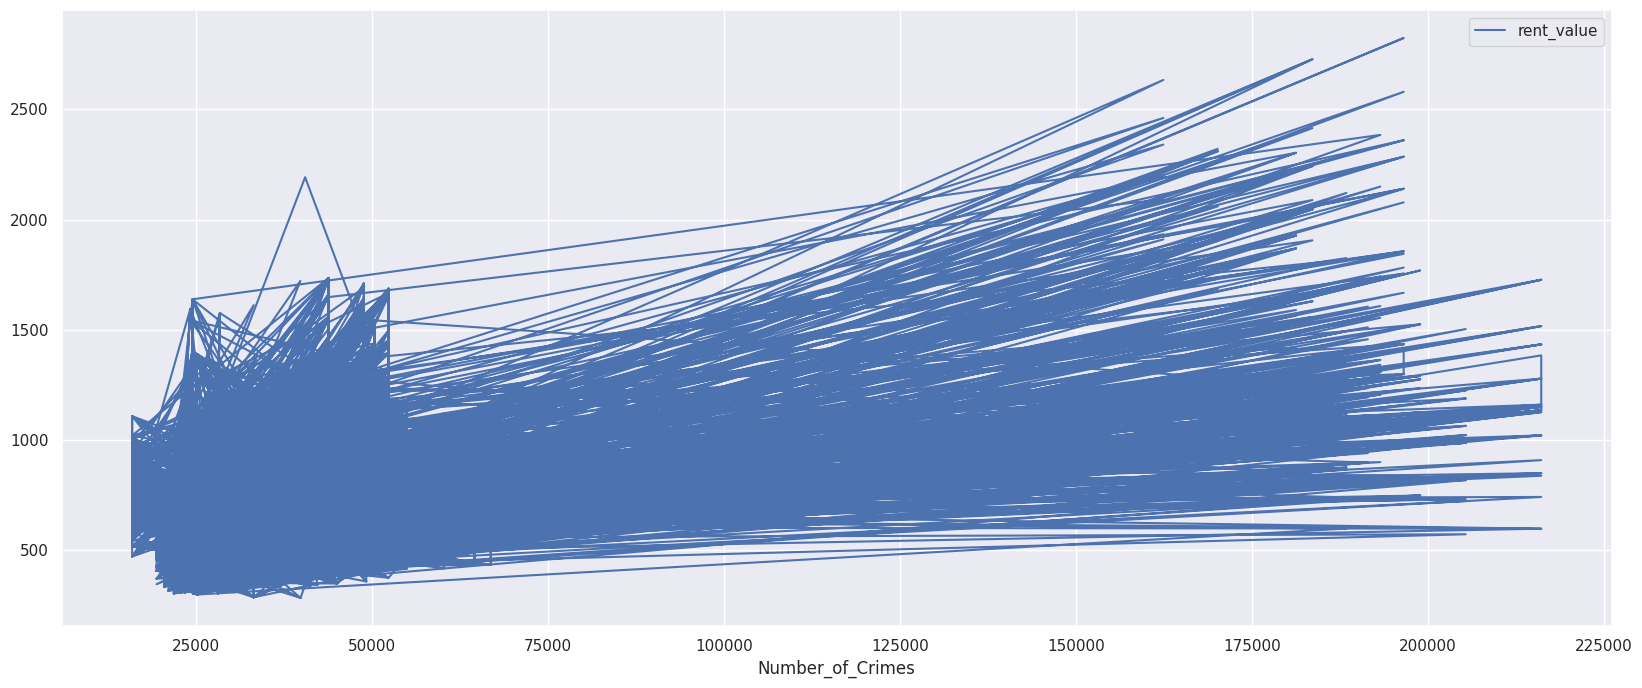

In [104]:
equal_sample_df.plot.line(x = "Number_of_Crimes", y = "rent_value", use_index = True)

<Axes: xlabel='Number_of_Crimes'>

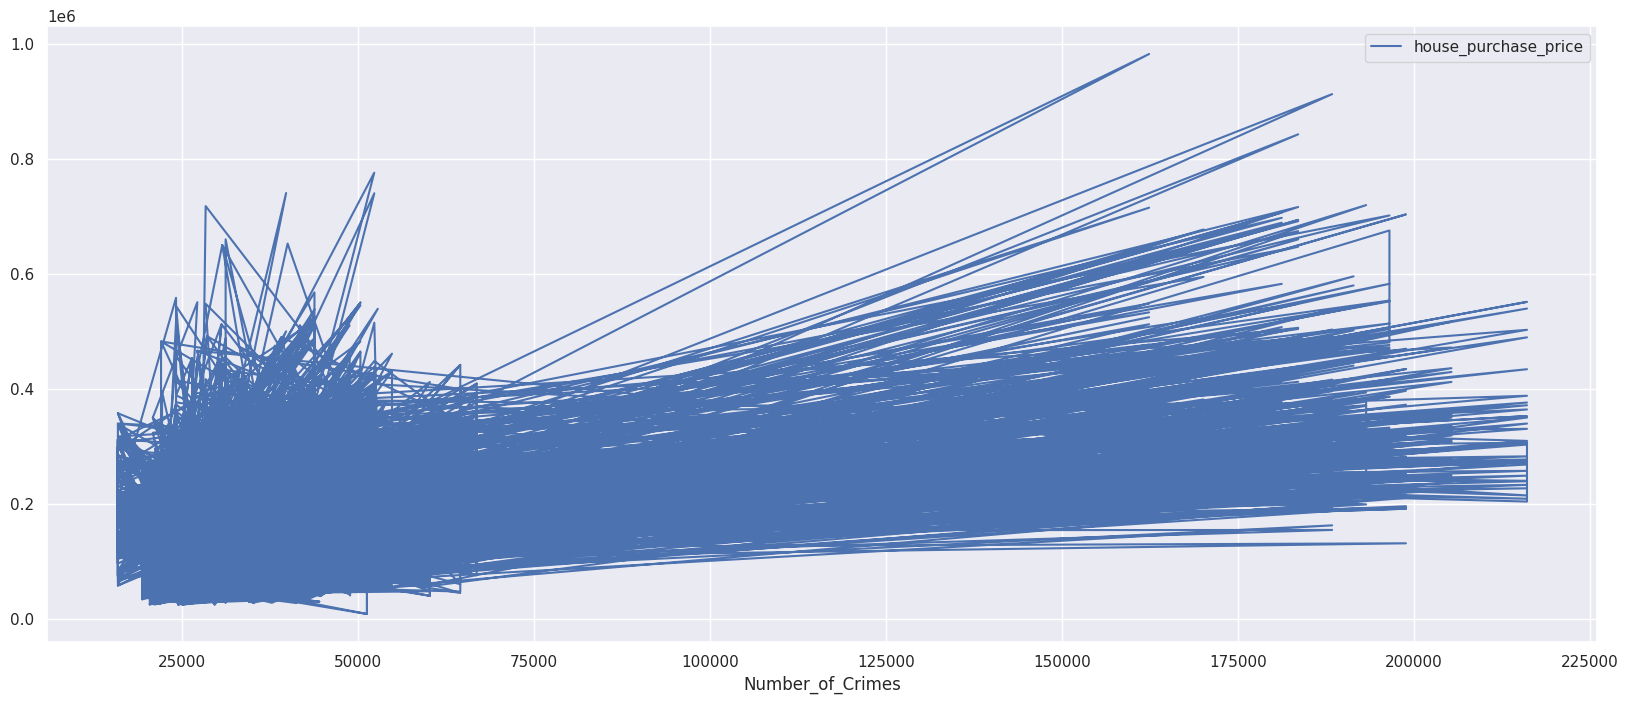

In [105]:
equal_sample_df.plot.line(x = "Number_of_Crimes", y = "house_purchase_price", use_index = True)

lets create a new column that shows the value 2 year in the future (house purchase value)

In [106]:
#cb_df['next_year_HPP'] = cb_df['house_purchase_price'].shift(-2)
#cb_df['next_year_RV'] = cb_df['rent_value'].shift(-2)
#cb_df.loc[cb_df['Year']  7]

#Creating models for the combined df

In [107]:
cb_sample_df

Year  Number of Bedrooms  rent_value  Apartment  Detached house  \
0      2010                   3      758.61          0               0   
1      2010                   3      865.53          1               0   
2      2010                   4      923.19          0               1   
3      2010                   1      488.50          1               0   
4      2010                   3      721.60          0               1   
...     ...                 ...         ...        ...             ...   
45291  2020                   1      775.77          0               1   
45292  2020                   4     1611.05          0               0   
45293  2020                   3     1148.92          0               0   
45294  2020                   4      870.45          0               1   
45295  2020                   1      888.97          0               0   

       Other flats  Semi detached house  Terrace house  avg_disposable_income  \
0                0                    1              0               16606.73   
1                0                    0              0               19023.94   
2                0                    0              0               19023.94   
3                0                    0              0               16606.73   
4                0                    0              0               16606.73   
...            ...                  ...            ...                    ...   
45291            0                    0              0               23855.61   
45292            0                    0              1               23855.61   
45293            0                    0              1               23855.61   
45294            0                    0              0               23855.61   
45295            0                    0              1               20462.13   

       house_purchase_price  Number_of_Crimes  Border  Dublin  Mid_East  \
0                  209996.0             52341   False   False     False   
1                  280913.0             52341   False   False     False   
2                  242048.0             52341   False   False     False   
3                  270829.0             52341   False   False     False   
4                  320861.0             52341   False   False     False   
...                     ...               ...     ...     ...       ...   
45291              243287.0             33177   False   False     False   
45292              194200.0             33177   False   False     False   
45293              390000.0             33177   False   False     False   
45294              183000.0             33177   False   False     False   
45295              359226.0             33177   False   False     False   

       Mid_West  Midland  South_East  South_West   West  
0         False    False       False        True  False  
1         False    False       False        True  False  
2         False    False       False        True  False  
3         False    False       False        True  False  
4         False    False       False        True  False  
...         ...      ...         ...         ...    ...  
45291     False    False       False        True  False  
45292     False    False       False        True  False  
45293     False    False       False        True  False  
45294     False    False       False        True  False  
45295     False    False       False        True  False  

[45296 rows x 19 columns]

In [108]:
#cb_sample_df = cb_sample_df.drop(['Type of Offence'], axis=1)

##Train test split 1: Target = house purchase price

In [109]:
X_cb1 = cb_sample_df.drop(["house_purchase_price"], axis=1)
#The house purchase price is set as the target variable
y_cb1 = cb_sample_df['house_purchase_price']

In [110]:
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cb1,y_cb1, test_size= 0.2)

##Train test split 2: Target = rent price

In [111]:
X_cb2 = cb_sample_df.drop(["rent_value"], axis=1)
#The rent price is set as the target variable
y_cb2 = cb_sample_df['rent_value']

In [112]:
X_train_cb2, X_test_cb2, y_train_cb2, y_test_cb2 = train_test_split(X_cb2,y_cb2, test_size= 0.2)

In [113]:
#cb_df['Year'] = pd.to_datetime(cb_df['Year'])
#cb_df = cb_df.sort_values(by = 'Year')

##linear regression 1:
##Target = house purchase price

In [ ]:
reg = LinearRegression()
reg.fit(X_train_cb, y_train_cb)


LinearRegression()

In [ ]:
LR_1_pred = reg.predict(X_test_cb)

In [ ]:
lin_reg1_RMSE = np.sqrt(mean_squared_error(y_test_cb, LR_1_pred))

In [ ]:
lin_reg1_RMSE

In [ ]:
lin_reg1_R2 = reg.score(X_test_cb, y_test_cb)

In [ ]:
lin_reg1_R2

**Lets standardize the data using standard scalar to try to improve the score**

In [ ]:
scalar = StandardScaler()
X_train_s = scalar.fit_transform(X_train_cb)
reg.fit(X_train_s, y_train_cb)

LinearRegression()

In [ ]:
X_test_s = scalar.transform(X_test_cb)
reg.score(X_test_s, y_test_cb)

0.36511530373482504

##linear regression 2:
##Target = rent price

In [ ]:
reg2 = LinearRegression()
reg2.fit(X_train_cb2, y_train_cb2)

LinearRegression()

In [ ]:
LR_2_pred = reg2.predict(X_test_cb2)

In [ ]:
lin_reg2_RMSE = np.sqrt(mean_squared_error(y_test_cb2, LR_2_pred))

In [ ]:
lin_reg2_RMSE

In [ ]:
lin_reg2_R2 = reg2.score(X_test_cb2, y_test_cb2)

In [ ]:
lin_reg2_R2

**Lets standardize the data using standard scalar to try to improve the score**

In [ ]:
scalar = StandardScaler()
X_train_s2 = scalar.fit_transform(X_train_cb2)
reg2.fit(X_train_s2, y_train_cb2)

LinearRegression()

In [ ]:
X_test_s2 = scalar.transform(X_test_cb2)
reg2.score(X_test_s2, y_test_cb2)

0.7607374582629433

##decision tree model 1:
##Target = house purchase price

In [ ]:
regr_cb = DecisionTreeRegressor(max_depth=6)
regr_cb.fit(X_train_cb, y_train_cb)
pred = regr_cb.predict(X_test_cb)

In [ ]:
regr_cb.score(X_test_cb, y_test_cb)

0.4103764874476614

In [ ]:
np.sqrt(mean_squared_error(y_test_cb, pred))

67646.98222687904

###Cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV

regr_DTR = DecisionTreeRegressor()

param_grid={"splitter":["best","random"],
            "max_depth" : [3,5,7,9,11,12],
           "min_samples_leaf":[3,4,5,6,7,8,9,10]
}

grid_search_DTR = GridSearchCV(regr_DTR, param_grid, cv= 5,
                           scoring= "neg_mean_squared_error",
                           return_train_score=True)
grid_search_DTR.fit(X_train_cb, y_train_cb)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 12],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search_DTR.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=9)

In [ ]:
best_DTR = grid_search_DTR.best_estimator_
pred_DTR = best_DTR.predict(X_test_cb)

###saving model to save time

In [ ]:
import pickle
filename = 'best_decision_tree_house_price.pkl'
pickle.dump(best_DTR, open(filename, 'wb'))

In [ ]:
DTR1_RMSE = np.sqrt(mean_squared_error(y_test_cb, pred_DTR))

In [ ]:
DTR1_RMSE

In [ ]:
DTR1_R2 = best_DTR.score(X_test_cb, y_test_cb)

In [ ]:
DTR1_R2

**function for creating trees using pydot**

In [ ]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

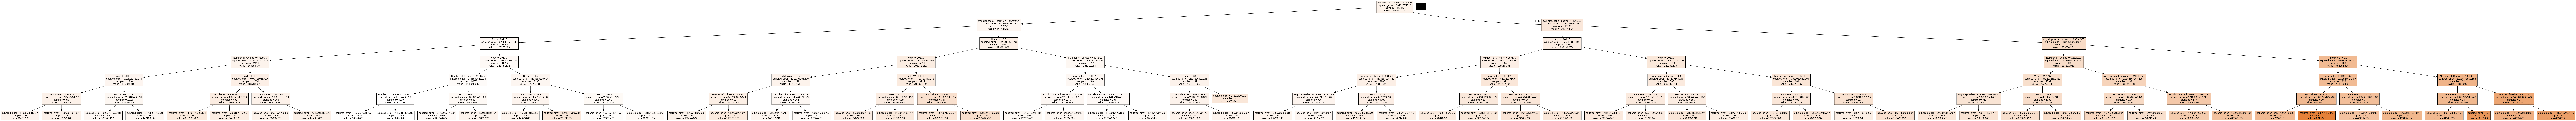

In [ ]:
graph, = print_tree(regr_cb, features=X_cb1.columns)
Image(graph.create_png())

Text(0, 0.5, 'y_test')

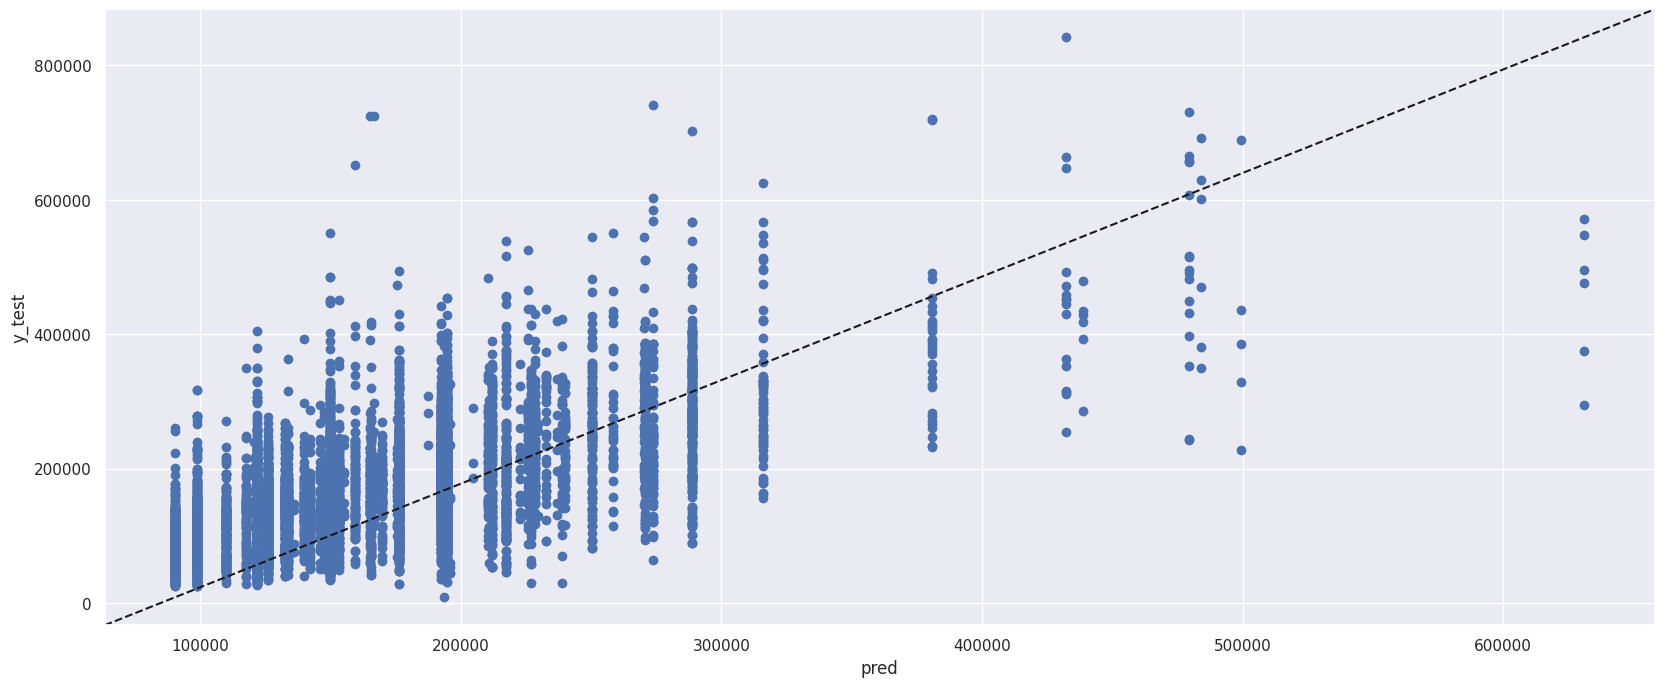

In [ ]:
plt.scatter(pred, y_test_cb, label='house_purchase_price')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

##decision tree model 2:
##Target = rent price

In [ ]:
regr_cb_2nd = DecisionTreeRegressor(max_depth=10)
regr_cb_2nd.fit(X_train_cb2, y_train_cb2)
pred_2nd = regr_cb_2nd.predict(X_test_cb2)

In [ ]:
np.sqrt(mean_squared_error(y_test_cb2, pred_2nd))

98.60577698079577

In [ ]:
regr_cb_2nd.score(X_test_cb2, y_test_cb2)

0.8531003437006137

###Cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV

regr_DTR2 = DecisionTreeRegressor()

param_grid ={"splitter":["best","random"],
            "max_depth" : [3,5,7,9,11,12],
           "min_samples_leaf":[3,4,5,6,7,8,9,10]
}

grid_search_DTR2 = GridSearchCV(regr_DTR2, param_grid, cv= 5,
                           scoring= "neg_mean_squared_error",
                           return_train_score=True)
grid_search_DTR2.fit(X_train_cb2, y_train_cb2)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 12],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search_DTR2.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_leaf=5, splitter='random')

In [ ]:
best_DTR2 = grid_search_DTR2.best_estimator_
pred_DTR2 = best_DTR2.predict(X_test_cb2)

In [ ]:
DTR2_RMSE = np.sqrt(mean_squared_error(y_test_cb2, pred_DTR2))

In [ ]:
DTR2_RMSE

In [ ]:
DTR2_R2 = best_DTR2.score(X_test_cb2, y_test_cb2)

In [ ]:
DTR2_R2

###saving model to save time

In [ ]:
import pickle
filename = 'best_decision_tree_rent_price.pkl'
pickle.dump(best_DTR2, open(filename, 'wb'))

In [ ]:
#loaded_DTR_model = pickle.load(open('/content/best_random_forest_rent_price.pkl', 'rb'))

Text(0, 0.5, 'y_test')

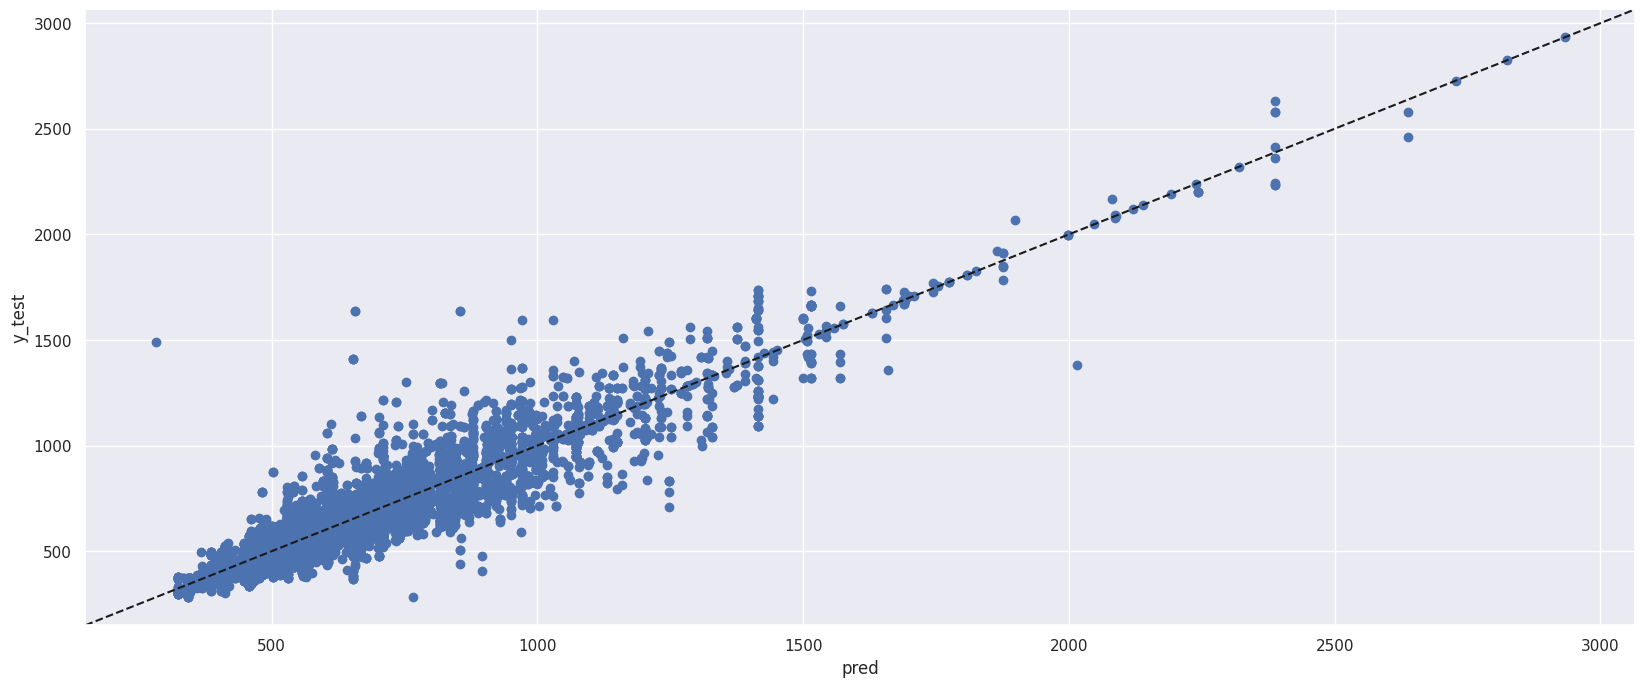

In [ ]:
plt.scatter(pred_2nd, y_test_cb2, label='rent_value')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

##K-Nearest Neighbours (KNN) model 1
##Target = house purchase price

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn = neighbors.KNeighborsRegressor()

knn_model = GridSearchCV(knn, param_grid, cv=5)
knn_model.fit(X_train_cb,y_train_cb)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [ ]:
best_KNN1 = knn_model.best_estimator_

In [ ]:
pred_KNN1 = best_KNN1.predict(X_test_cb)

In [ ]:
KNN1_RMSE = np.sqrt(mean_squared_error(y_test_cb, pred_KNN1))

In [ ]:
KNN1_RMSE

In [ ]:
KNN1_R2 = knn_model.score(X_test_cb, y_test_cb)

In [ ]:
KNN1_R2

In [ ]:
import pickle
filename = 'best_KNN_house_price.pkl'
pickle.dump(best_KNN1, open(filename, 'wb'))

##K-Nearest Neighbours (KNN) model 2
##Target = rent price

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn = neighbors.KNeighborsRegressor()

knn_model2 = GridSearchCV(knn, param_grid, cv=5)
knn_model2.fit(X_train_cb2,y_train_cb2)
knn_model2.best_params_

{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

In [ ]:
best_KNN2 = knn_model2.best_estimator_

In [ ]:
pred_KNN2 = best_KNN2.predict(X_test_cb2)

In [ ]:
KNN2_RMSE = np.sqrt(mean_squared_error(y_test_cb2, pred_KNN2))

In [ ]:
KNN2_RMSE

In [ ]:
KNN2_R2 = knn_model2.score(X_test_cb2, y_test_cb2)

In [ ]:
KNN2_R2

In [ ]:
import pickle
filename = 'best_KNN_rent_price.pkl'
pickle.dump(best_KNN1, open(filename, 'wb'))

**We will now use the random forest regressor to try to imrpove the model**

##Random forest model 1:
##Target = house purchase price

In [ ]:
rf_cb = RandomForestRegressor(max_features='sqrt', random_state=1)
rf_cb.fit(X_train_cb, y_train_cb)

RandomForestRegressor(max_features='sqrt', random_state=1)

Text(0, 0.5, 'y_test')

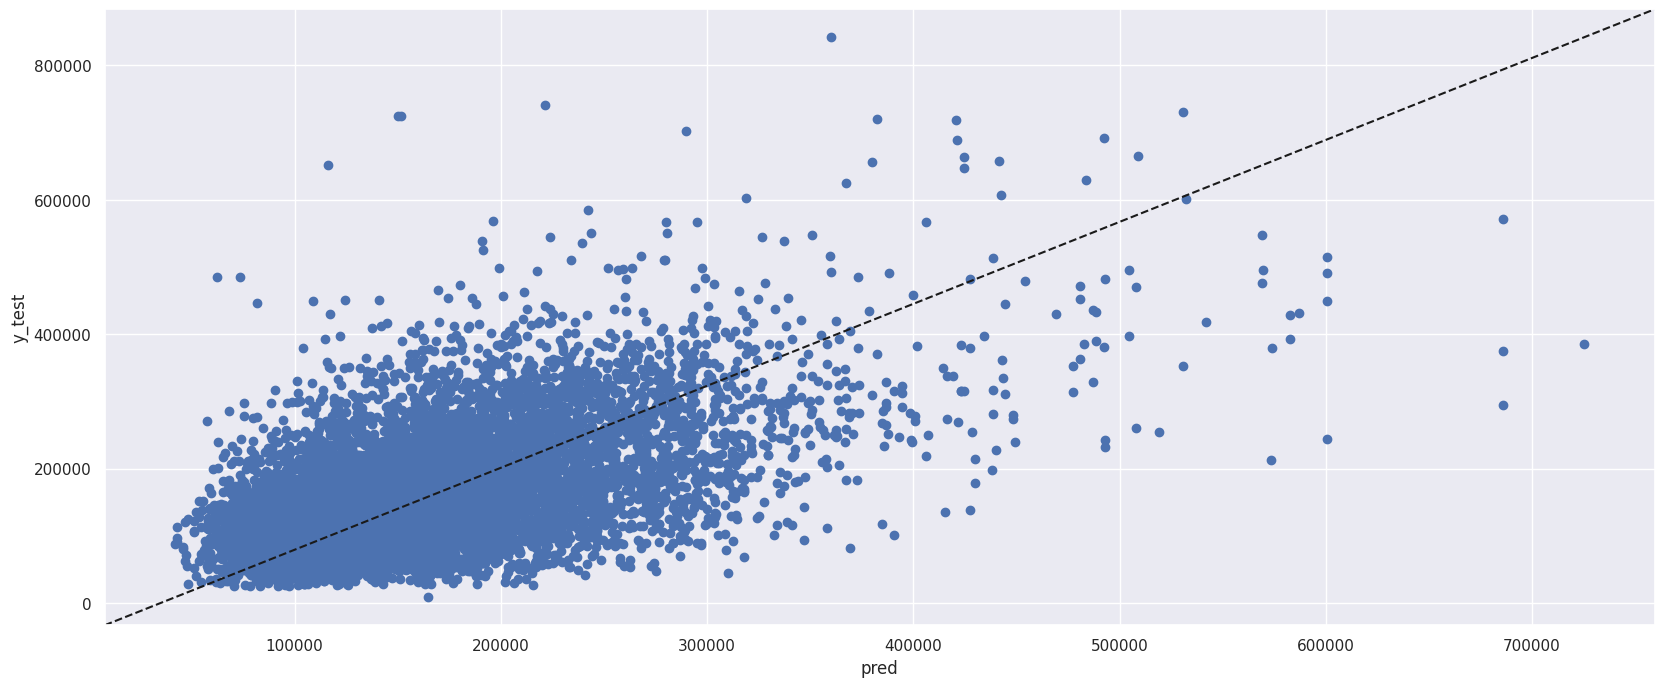

In [ ]:
pred = rf_cb.predict(X_test_cb)
#pred_prob=rf.predict_proba(test)[:, 1]

plt.scatter(pred, y_test_cb, label='house_purchase_price')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:
np.sqrt(mean_squared_error(y_test_cb, pred))

76570.5448428191

In [ ]:
rf_cb.score(X_test_cb, y_test_cb)

0.24455749996151865

##Random forest model 2:
##Target = rent price

In [ ]:
rf_cb2 = RandomForestRegressor(max_features='sqrt', random_state=1)
rf_cb2.fit(X_train_cb2, y_train_cb2)

RandomForestRegressor(max_features='sqrt', random_state=1)

Text(0, 0.5, 'y_test')

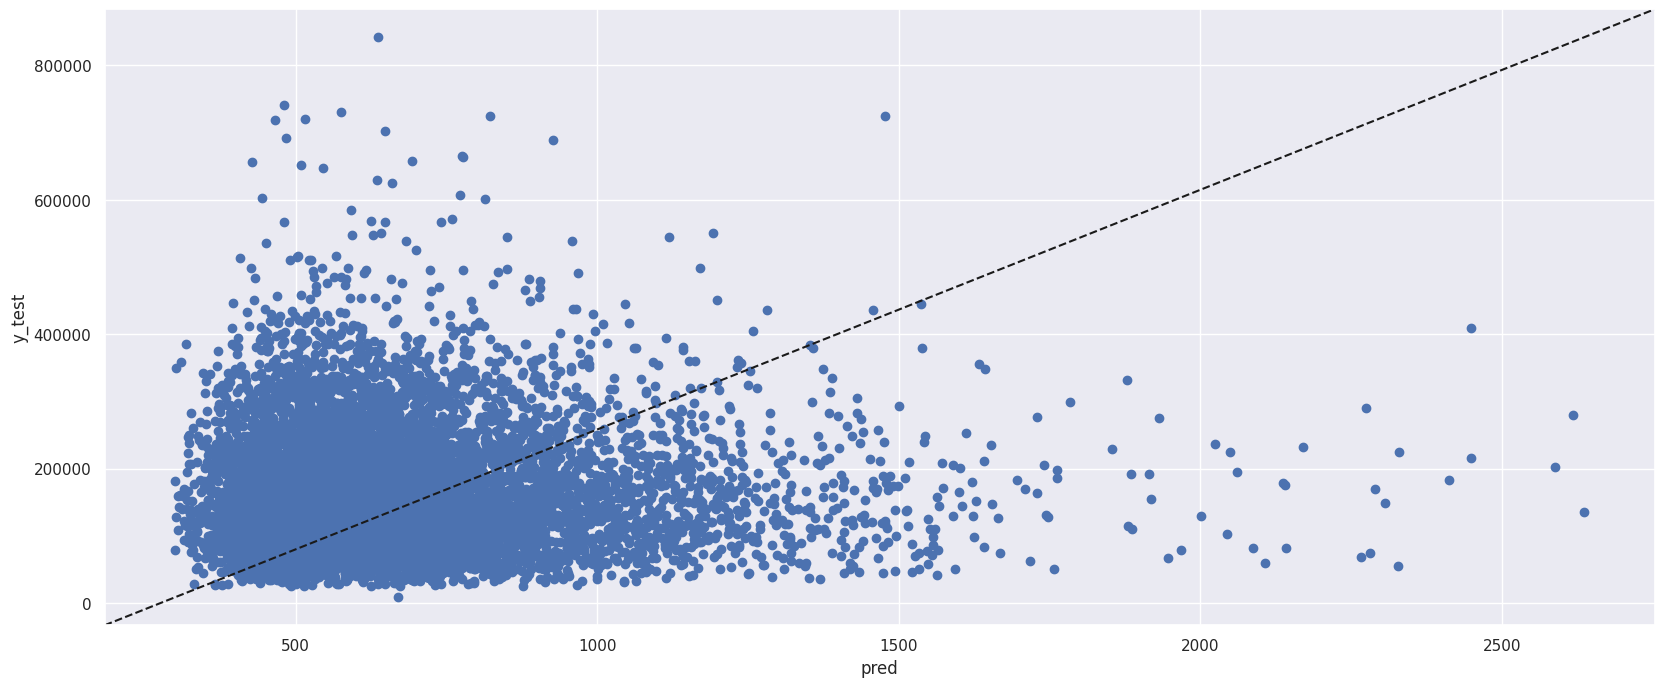

In [ ]:
pred2 = rf_cb2.predict(X_test_cb2)
#pred_prob=rf.predict_proba(test)[:, 1]

plt.scatter(pred2, y_test_cb, label='rent_value')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:
np.sqrt(mean_squared_error(y_test_cb2, pred2))

104.42438605788674

In [ ]:
rf_cb2.score(X_test_cb2, y_test_cb2)

0.8352520869762602

###Cross Validation

####Grid search 1:
###Target = house purchse value

**We will now use cross validation to try to improve the model**

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [50,100,150],
    "max_features": [8,12,16],
    "min_samples_split": [10,15,20]
}

grid_search = GridSearchCV(forest, param_grid, cv= 5,
                           scoring= "neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train_cb, y_train_cb)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 16],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, min_samples_split=20, n_estimators=150)

In [ ]:
best_forest = grid_search.best_estimator_
pred = best_forest.predict(X_test_cb)


In [ ]:
RF1_RMSE = np.sqrt(mean_squared_error(y_test_cb, pred))

In [ ]:
RF1_RMSE

In [ ]:
RF1_R2 = best_forest.score(X_test_cb, y_test_cb)

In [ ]:
RF1_R2

###saving model to save time

In [ ]:
import pickle
filename = 'best_random_forestGS_house_price.pkl'
pickle.dump(best_forest, open(filename, 'wb'))

####Grid search 2:
###Target = rent value

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [50,100,150],
    "max_features": [8,12,16],
    "min_samples_split": [10,15,20]
}

grid_search2 = GridSearchCV(forest, param_grid, cv= 3,
                           scoring= "neg_mean_squared_error",
                          return_train_score=True)
grid_search2.fit(X_train_cb2, y_train_cb2)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 16],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search2.best_estimator_

RandomForestRegressor(max_features=8, min_samples_split=15, n_estimators=150)

In [ ]:
best_forest2 = grid_search2.best_estimator_
pred2 = best_forest2.predict(X_test_cb2)


In [ ]:
pred2

array([380.120192  , 843.645875  , 534.89330029, ..., 974.56744802,
       503.72100117, 775.13097853])

In [ ]:
RF2_RMSE = np.sqrt(mean_squared_error(y_test_cb2, pred2))

In [ ]:
RF2_RMSE

In [ ]:
RF2_R2 = best_forest2.score(X_test_cb2, y_test_cb2)

In [ ]:
RF2_R2

###saving model to save time

In [ ]:
import pickle
filename = 'best_random_forestGS_rent_price.pkl'
pickle.dump(best_forest2, open(filename, 'wb'))

In [ ]:
#loaded_forest_rent_model = pickle.load(open('/content/best_random_forestGS_rent_price.pkl', 'rb'))

In [ ]:
#loaded_forest_rent_model.predict(X_test_cb2)

**A slight improvement from the linear regression**
**We will now use randomized search cross validation**

###Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [2, 4]
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 4], 'bootstrap': [True, False]}


####Randomized search 1:
Target = house price value

In [ ]:
rf_RS_cb = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf_RS_cb,
                               param_distributions = random_grid,
                               n_iter = 50, cv = 3,
                               verbose=2, random_state=42,
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_cb, y_train_cb)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 325,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
best_random = rf_random.best_estimator_
#grid_accuracy = evaluate(best_grid, X_test, y_test)
pred_random = best_random.predict(X_test_cb)

In [ ]:
np.sqrt(mean_squared_error(y_test_cb, pred_random))

67361.86914819771

In [ ]:
best_random.score(X_test_cb, y_test_cb)

0.4153362092990951

###saving model to save time

In [ ]:
import pickle
filename = 'best_random_forestRS_house_price.pkl'
pickle.dump(best_random, open(filename, 'wb'))

####Randomized search 2:
Target = rent value

In [ ]:
rf_RS_cb2 = RandomForestRegressor()
rf_random2 = RandomizedSearchCV(estimator = rf_RS_cb2,
                               param_distributions = random_grid,
                               n_iter = 50, cv = 2,
                               verbose=2, random_state=42,
                               n_jobs = -1)
# Fit the random search model
rf_random2.fit(X_train_cb2, y_train_cb2)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
rf_random2.best_params_

In [ ]:
best_random2 = rf_random2.best_estimator_
#grid_accuracy = evaluate(best_grid, X_test, y_test)
pred_random2 = best_random2.predict(X_test_cb2)


In [ ]:
np.sqrt(mean_squared_error(y_test_cb2, pred_random2))

In [ ]:
best_random2.score(X_test_cb2, y_test_cb2)

###saving model to save time

In [ ]:
import pickle
filename = 'best_random_forestRS_rent_price.pkl'
pickle.dump(best_random2, open(filename, 'wb'))

##XGBoost

###XGB 1

In [ ]:
reg_xgb1 = xgb.XGBRegressor(n_estimators= 1000, early_stopping_rounds= 50) #stops early if no improvment after 50 trees
reg_xgb1.fit(X_train_cb, y_train_cb,
           eval_set=[(X_train_cb, y_train_cb), (X_test_cb, y_test_cb)],
           verbose=10)

[0]	validation_0-rmse:79286.53798	validation_1-rmse:78024.93986
[10]	validation_0-rmse:66595.39095	validation_1-rmse:67301.82662
[20]	validation_0-rmse:65790.52452	validation_1-rmse:67592.51561
[30]	validation_0-rmse:65206.70380	validation_1-rmse:67948.50694
[40]	validation_0-rmse:64636.90942	validation_1-rmse:68181.66251
[50]	validation_0-rmse:64137.13395	validation_1-rmse:68445.66393
[55]	validation_0-rmse:63941.96466	validation_1-rmse:68523.91287


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
reg_xgb1.score(X_test_cb, y_test_cb)

0.4175743276848638

###Grid search

In [ ]:
xgb_model = XGBRegressor()

param_tuning = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators' : [100, 200, 300],
    'objective': ['reg:squarederror']
}


xgb_gridsearch = GridSearchCV(estimator = xgb_model,
                        param_grid = param_tuning,
                        #scoring = 'neg_mean_absolute_error', #MAE
                        scoring = 'neg_mean_squared_error',  #MSE
                        cv = 5,
                        n_jobs = -1,
                        verbose = 1)

xgb_gridsearch.fit(X_train_cb,y_train_cb)



Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.5, 0.7]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
xgb_gridsearch.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
best_xgb = xgb_gridsearch.best_estimator_


In [ ]:
xgb_pred = best_xgb.predict(X_test_cb)

In [ ]:
XGB1_RMSE = np.sqrt(mean_squared_error(y_test_cb, xgb_pred))

In [ ]:
XGB1_RMSE

67095.38729520809

In [ ]:
XGB1_R2 = best_xgb.score(X_test_cb, y_test_cb)

In [ ]:
XGB1_R2

0.4199528898433097

###saving model to save time

In [ ]:
import pickle
filename = 'best_xgb_house_price.pkl'
pickle.dump(best_xgb, open(filename, 'wb'))

###Feature importance

In [ ]:
FI1 = pd.DataFrame(data = reg_xgb1.feature_importances_,
             index = reg_xgb1.feature_names_in_,
             columns = ['importance'])

In [ ]:
#FI1.sort_values('importance').plot(kind= 'barh', title= 'Feature Importance')

###XGB 2

In [ ]:
reg_xgb2 = xgb.XGBRegressor(n_estimators= 1000, early_stopping_rounds= 50) #stops early if no improvment after 50 trees
reg_xgb2.fit(X_train_cb2, y_train_cb2,
           eval_set=[(X_train_cb2, y_train_cb2), (X_test_cb2, y_test_cb2)],
           verbose=10)

[0]	validation_0-rmse:196.51089	validation_1-rmse:199.48724
[10]	validation_0-rmse:95.63957	validation_1-rmse:98.04853
[20]	validation_0-rmse:90.93557	validation_1-rmse:95.49924
[30]	validation_0-rmse:88.79519	validation_1-rmse:95.49670
[40]	validation_0-rmse:87.39428	validation_1-rmse:95.57443
[50]	validation_0-rmse:86.18421	validation_1-rmse:96.00450
[60]	validation_0-rmse:85.05662	validation_1-rmse:96.05140
[70]	validation_0-rmse:83.98745	validation_1-rmse:96.26227
[77]	validation_0-rmse:83.36553	validation_1-rmse:96.35422


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
reg_xgb2.score(X_test_cb2, y_test_cb2)

0.8626662050326815

###Grid Search

In [ ]:
xgb_model = XGBRegressor()

param_tuning = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators' : [100, 200, 300],
    'objective': ['reg:squarederror']
}


xgb_gridsearch2 = GridSearchCV(estimator = xgb_model,
                        param_grid = param_tuning,
                        #scoring = 'neg_mean_absolute_error', #MAE
                        scoring = 'neg_mean_squared_error',  #MSE
                        cv = 5,
                        n_jobs = -1,
                        verbose = 1)

xgb_gridsearch2.fit(X_train_cb2,y_train_cb2)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.5, 0.7]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
xgb_gridsearch2.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
best_xgb2 = xgb_gridsearch2.best_estimator_

In [ ]:
xgb_pred2 = best_xgb2.predict(X_test_cb2)

In [ ]:
XGB2_RMSE = np.sqrt(mean_squared_error(y_test_cb2, xgb_pred2))

In [ ]:
XGB2_RMSE

94.13373903238718

In [ ]:
XGB2_R2 = best_xgb2.score(X_test_cb2, y_test_cb2)

In [ ]:
XGB2_R2

0.866122781894111

###saving model to save time

In [ ]:
import pickle
filename = 'best_xgb_rent_price.pkl'
pickle.dump(best_xgb2, open(filename, 'wb'))

###Feature importance

In [ ]:
FI2 = pd.DataFrame(data = reg_xgb2.feature_importances_,
             index = reg_xgb2.feature_names_in_,
             columns = ['importance'])

In [ ]:
FI2.sort_values('importance').plot(kind= 'barh', title= 'Feature Importance')

##Train test split 3: Divided by year (DBY)
Training = before 2018,

Test = 2018 or later


We will use XGBRegressor to do some time series forecasting for this train test split (DYB)

In [115]:
train_TS = equal_sample_df.loc[equal_sample_df['Year'] < 2018]
test_TS = equal_sample_df.loc[equal_sample_df['Year'] >= 2018]

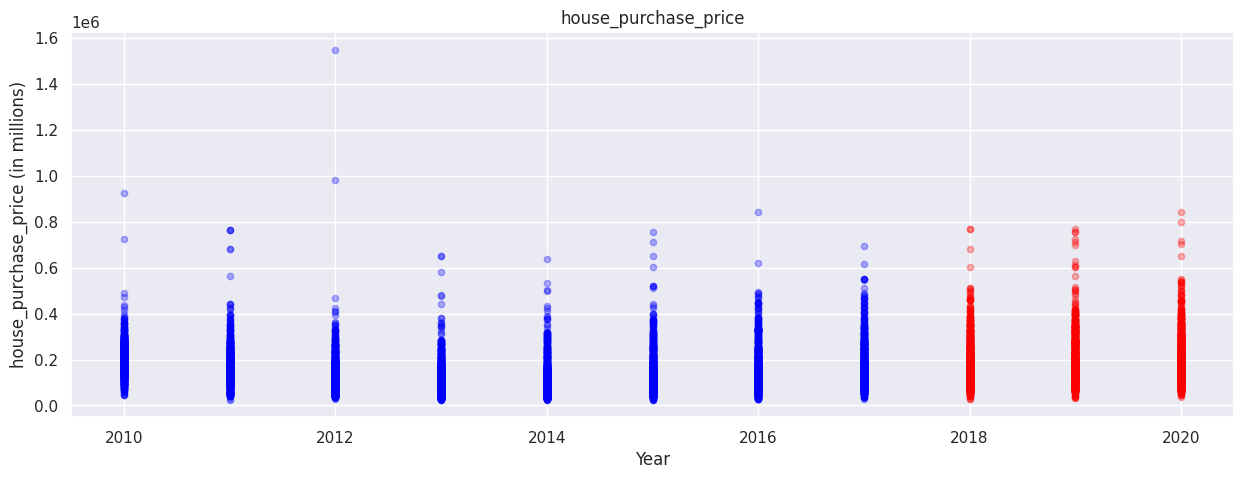

In [116]:
fig, ax = plt.subplots(figsize=(15,5))
train_TS.plot(x='Year', y='house_purchase_price', color= 'blue', kind= 'scatter', ax = ax, alpha= 0.3)
test_TS.plot(x='Year', y='house_purchase_price', color= 'red', kind= 'scatter', ax = ax, alpha= 0.3)
plt.xlabel("Year")
plt.ylabel("house_purchase_price (in millions)")
plt.title("house_purchase_price")
plt.show()

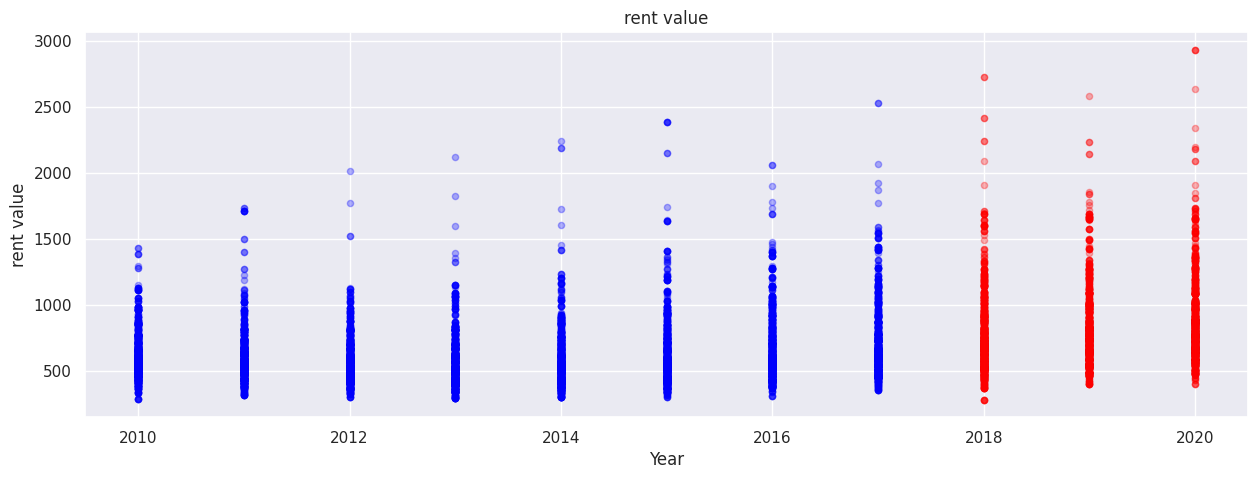

In [117]:
fig, ax = plt.subplots(figsize=(15,5))
train_TS.plot(x='Year', y='rent_value', color= 'blue', kind= 'scatter', ax = ax, alpha= 0.3)
test_TS.plot(x='Year', y='rent_value', color= 'red', kind= 'scatter', ax = ax, alpha= 0.3)
plt.xlabel("Year")
plt.ylabel("rent value")
plt.title("rent value")
plt.show()

###Train Test Split (DBY) Target = house_purchase_price



In [118]:
X_DBY_train = train_TS.drop(["house_purchase_price"], axis=1)
y_DBY_train = train_TS['house_purchase_price']

X_DBY_test = test_TS.drop(["house_purchase_price"], axis=1)
y_DBY_test = test_TS['house_purchase_price']

####XGBoost

In [147]:
reg_TS1 = xgb.XGBRegressor(n_estimators= 1000, early_stopping_rounds= 50) #stops early if no improvment after 50 trees
reg_TS1.fit(X_DBY_train, y_DBY_train,
           eval_set=[(X_DBY_train, y_DBY_train), (X_DBY_test, y_DBY_test)],
           verbose=25)

In [ ]:
reg_TS1.score(X_DBY_test, y_DBY_test)

####Feature importance

In [ ]:
FI = pd.DataFrame(data = reg_TS1.feature_importances_,
             index = reg_TS1.feature_names_in_,
             columns = ['importance'])

In [ ]:
FI.sort_values('importance').plot(kind= 'barh', title= 'Feature Importance')

####Forecast on test set using trained model

In [ ]:
test_TS['predictions'] = reg_TS1.predict(X_DBY_test)
equal_sample_df = equal_sample_df.merge(test_TS[['predictions']], how= 'left', left_index=True, right_index=True)


In [ ]:
equal_sample_df

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
equal_sample_df.plot(x='Year', y='house_purchase_price', color= 'blue', kind= 'scatter', ax = ax, alpha= 0.3)
test_TS.plot(x='Year', y='house_purchase_price', color= 'red', kind= 'scatter', ax = ax, alpha= 0.3)
plt.legend(['Truth Data', 'Predictions'])
plt.show()

In [ ]:
ax = equal_sample_df[['house_purchase_price']].plot(figsize=(15,8))
equal_sample_df['predictions'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Existing data and predictions')
plt.show()

###Train Test Split (DBY) Target = rent_value

In [ ]:
train_TS2 = equal_sample_df.loc[equal_sample_df['Year'] < 2018]
test_TS2 = equal_sample_df.loc[equal_sample_df['Year'] >= 2018]

In [ ]:
X_DBY_train2 = train_TS2.drop(["rent_value"], axis=1)
y_DBY_train2 = train_TS2['rent_value']

X_DBY_test2 = test_TS2.drop(["rent_value"], axis=1)
y_DBY_test2 = test_TS2['rent_value']

####XGBoost

In [ ]:
reg_TS2 = xgb.XGBRegressor(n_estimators= 1000, early_stopping_rounds= 50) #stops early if no improvment after 50 trees
reg_TS2.fit(X_DBY_train2, y_DBY_train2,
           eval_set=[(X_DBY_train2, y_DBY_train2), (X_DBY_test2, y_DBY_test2)],
           verbose=25)

In [ ]:
reg_TS2.score(X_DBY_test2, y_DBY_test2)

####Feature importance

In [ ]:
FI = pd.DataFrame(data = reg_TS2.feature_importances_,
             index = reg_TS2.feature_names_in_,
             columns = ['importance'])

In [ ]:
FI.sort_values('importance').plot(kind= 'barh', title= 'Feature Importance')

#Getting the accuracy of the optimal model (XGBoost) on the dataset without the 'number of crimes' column

In [127]:
cb_sample_df

Year  Number of Bedrooms  rent_value  Apartment  Detached house  \
0      2010                   3      758.61          0               0   
1      2010                   3      865.53          1               0   
2      2010                   4      923.19          0               1   
3      2010                   1      488.50          1               0   
4      2010                   3      721.60          0               1   
...     ...                 ...         ...        ...             ...   
45291  2020                   1      775.77          0               1   
45292  2020                   4     1611.05          0               0   
45293  2020                   3     1148.92          0               0   
45294  2020                   4      870.45          0               1   
45295  2020                   1      888.97          0               0   

       Other flats  Semi detached house  Terrace house  avg_disposable_income  \
0                0                    1              0               16606.73   
1                0                    0              0               19023.94   
2                0                    0              0               19023.94   
3                0                    0              0               16606.73   
4                0                    0              0               16606.73   
...            ...                  ...            ...                    ...   
45291            0                    0              0               23855.61   
45292            0                    0              1               23855.61   
45293            0                    0              1               23855.61   
45294            0                    0              0               23855.61   
45295            0                    0              1               20462.13   

       house_purchase_price  Number_of_Crimes  Border  Dublin  Mid_East  \
0                  209996.0             52341   False   False     False   
1                  280913.0             52341   False   False     False   
2                  242048.0             52341   False   False     False   
3                  270829.0             52341   False   False     False   
4                  320861.0             52341   False   False     False   
...                     ...               ...     ...     ...       ...   
45291              243287.0             33177   False   False     False   
45292              194200.0             33177   False   False     False   
45293              390000.0             33177   False   False     False   
45294              183000.0             33177   False   False     False   
45295              359226.0             33177   False   False     False   

       Mid_West  Midland  South_East  South_West   West  
0         False    False       False        True  False  
1         False    False       False        True  False  
2         False    False       False        True  False  
3         False    False       False        True  False  
4         False    False       False        True  False  
...         ...      ...         ...         ...    ...  
45291     False    False       False        True  False  
45292     False    False       False        True  False  
45293     False    False       False        True  False  
45294     False    False       False        True  False  
45295     False    False       False        True  False  

[45296 rows x 19 columns]

In [128]:
cb_sample_df_comp = cb_sample_df.drop(['Number_of_Crimes'], axis = 1)

Target = House purchase price

In [129]:
X_cb1_comp = cb_sample_df_comp.drop(["house_purchase_price"], axis=1)
#The house purchase price is set as the target variable
y_cb1_comp = cb_sample_df_comp['house_purchase_price']

In [130]:
X_train_cb_comp, X_test_cb_comp, y_train_cb_comp, y_test_cb_comp = train_test_split(X_cb1_comp,y_cb1_comp, test_size= 0.2)

Target = Rent price

In [131]:
X_cb2_comp = cb_sample_df_comp.drop(["rent_value"], axis=1)
#The rent price is set as the target variable
y_cb2_comp = cb_sample_df_comp['rent_value']

In [132]:
X_train_cb2_comp, X_test_cb2_comp, y_train_cb2_comp, y_test_cb2_comp = train_test_split(X_cb2_comp,y_cb2_comp, test_size= 0.2)

##XGB for comparison dataset

###Target = house price

In [133]:
reg_xgb_comp1 = xgb.XGBRegressor(n_estimators= 1000, early_stopping_rounds= 50) #stops early if no improvment after 50 trees
reg_xgb_comp1.fit(X_train_cb_comp, y_train_cb_comp,
           eval_set=[(X_train_cb_comp, y_train_cb_comp), (X_test_cb_comp, y_test_cb_comp)],
           verbose=10)

[0]	validation_0-rmse:80072.73728	validation_1-rmse:79288.34874
[10]	validation_0-rmse:66820.09854	validation_1-rmse:71453.08329
[20]	validation_0-rmse:65973.08633	validation_1-rmse:73136.52583
[30]	validation_0-rmse:65470.36343	validation_1-rmse:73716.16242
[40]	validation_0-rmse:64992.13323	validation_1-rmse:73872.52540
[50]	validation_0-rmse:64469.82062	validation_1-rmse:74374.96366
[54]	validation_0-rmse:64263.31727	validation_1-rmse:74502.18890


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [134]:
reg_xgb_comp1.score(X_test_cb_comp, y_test_cb_comp)

0.37659457909924543

###Grid search

In [136]:
from sklearn.model_selection import GridSearchCV
xgb_model = XGBRegressor()

param_tuning = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators' : [100, 200, 300],
    'objective': ['reg:squarederror']
}


xgb_gridsearch = GridSearchCV(estimator = xgb_model,
                        param_grid = param_tuning,
                        #scoring = 'neg_mean_absolute_error', #MAE
                        scoring = 'neg_mean_squared_error',  #MSE
                        cv = 5,
                        n_jobs = -1,
                        verbose = 1)

xgb_gridsearch.fit(X_train_cb_comp,y_train_cb_comp)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.5, 0.7]},
             scoring='neg_mean_squared_error', verbose=1)

In [137]:
best_xgb_comp = xgb_gridsearch.best_estimator_

In [141]:
xgb_comp_pred = best_xgb_comp.predict(X_test_cb_comp)
XGB1_comp_RMSE = np.sqrt(mean_squared_error(y_test_cb_comp, xgb_comp_pred))
XGB1_comp_RMSE

68150.04808371545

In [140]:
XGB1_R2 = best_xgb_comp.score(X_test_cb_comp, y_test_cb_comp)
XGB1_R2

0.4063486346172238

###Target = rent price

In [142]:
reg_xgb_comp2 = xgb.XGBRegressor(n_estimators= 1000, early_stopping_rounds= 50) #stops early if no improvment after 50 trees
reg_xgb_comp2.fit(X_train_cb2_comp, y_train_cb2_comp,
           eval_set=[(X_train_cb2_comp, y_train_cb2_comp), (X_test_cb2_comp, y_test_cb2_comp)],
           verbose=10)

[0]	validation_0-rmse:196.21923	validation_1-rmse:200.71322
[10]	validation_0-rmse:96.67292	validation_1-rmse:99.60420
[20]	validation_0-rmse:92.35994	validation_1-rmse:96.80204
[30]	validation_0-rmse:90.56821	validation_1-rmse:97.14996
[40]	validation_0-rmse:88.89278	validation_1-rmse:96.97635
[50]	validation_0-rmse:87.17627	validation_1-rmse:97.31523
[60]	validation_0-rmse:86.17979	validation_1-rmse:97.69021
[69]	validation_0-rmse:85.18396	validation_1-rmse:98.10557


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [143]:
reg_xgb_comp2.score(X_test_cb2_comp, y_test_cb2_comp)

0.8599023342154278

###Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_model = XGBRegressor()

param_tuning = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators' : [100, 200, 300],
    'objective': ['reg:squarederror']
}


xgb_gridsearch = GridSearchCV(estimator = xgb_model,
                        param_grid = param_tuning,
                        #scoring = 'neg_mean_absolute_error', #MAE
                        scoring = 'neg_mean_squared_error',  #MSE
                        cv = 5,
                        n_jobs = -1,
                        verbose = 1)

xgb_gridsearch.fit(X_train_cb2_comp,y_train_cb2_comp)


In [ ]:
best_xgb_comp2 = xgb_gridsearch.best_estimator_

In [146]:
xgb_comp_pred2 = best_xgb_comp2.predict(X_test_cb2_comp)
XGB2_comp_RMSE = np.sqrt(mean_squared_error(y_test_cb2_comp, xgb_comp_pred2))
XGB2_comp_RMSE

85.18396

#dividing the df by region

In [ ]:
Dublin_df = cb_sample_df.loc[cb_sample_df['Dublin']==1]
South_East_df = cb_sample_df.loc[cb_sample_df['South_East']==1]
South_west_df = cb_sample_df.loc[cb_sample_df['South_West']==1]
West_df = cb_sample_df.loc[cb_sample_df['West']==1]
Midland_df = cb_sample_df.loc[cb_sample_df['Midland']==1]
Mid_East_df = cb_sample_df.loc[cb_sample_df['Mid_East']==1]
Mid_West_df = cb_sample_df.loc[cb_sample_df['Mid_West']==1]
Border_df = cb_sample_df.loc[cb_sample_df['Border']==1]


In [ ]:
#Find the average (mean) of a list
def Average(list):
  return sum(list) / len(list)

In [ ]:
Dublin_df

Year  Number of Bedrooms  rent_value  Apartment  Detached house  \
3643   2010                   3     1149.42          0               0   
3644   2010                   3     1277.81          0               1   
3645   2010                   3     1292.87          1               0   
3646   2010                   3     1277.81          0               1   
3647   2010                   2     1029.82          0               0   
...     ...                 ...         ...        ...             ...   
44394  2020                   2     1686.90          0               0   
44395  2020                   1     1450.27          1               0   
44396  2020                   3     1850.93          0               0   
44397  2020                   3     2092.22          0               1   
44398  2020                   2     1729.25          0               1   

       Other flats  Semi detached house  Terrace house  avg_disposable_income  \
3643             0                    0              1               20488.15   
3644             0                    0              0               20488.15   
3645             0                    0              0               20488.15   
3646             0                    0              0               20488.15   
3647             0                    1              0               20488.15   
...            ...                  ...            ...                    ...   
44394            0                    0              1               27686.21   
44395            0                    0              0               27686.21   
44396            0                    1              0               27686.21   
44397            0                    0              0               27686.21   
44398            0                    0              0               27686.21   

       house_purchase_price  Number_of_Crimes  Border  Dublin  Mid_East  \
3643               357355.0            216085   False    True     False   
3644               526918.0            216085   False    True     False   
3645               363147.0            216085   False    True     False   
3646               257836.0            216085   False    True     False   
3647               352680.0            216085   False    True     False   
...                     ...               ...     ...     ...       ...   
44394              433119.0            162407   False    True     False   
44395              282421.0            162407   False    True     False   
44396              352676.0            162407   False    True     False   
44397              663076.0            162407   False    True     False   
44398              448728.0            162407   False    True     False   

       Mid_West  Midland  South_East  South_West   West  
3643      False    False       False       False  False  
3644      False    False       False       False  False  
3645      False    False       False       False  False  
3646      False    False       False       False  False  
3647      False    False       False       False  False  
...         ...      ...         ...         ...    ...  
44394     False    False       False       False  False  
44395     False    False       False       False  False  
44396     False    False       False       False  False  
44397     False    False       False       False  False  
44398     False    False       False       False  False  

[844 rows x 19 columns]

##Dublin averages

In [ ]:
Dub_df_2016 = Dublin_df.loc[(Dublin_df['Year'] == 2016)]
Dub_df_2017 = Dublin_df.loc[(Dublin_df['Year'] == 2017)]
Dub_df_2018 = Dublin_df.loc[(Dublin_df['Year'] == 2018)]
Dub_df_2019 = Dublin_df.loc[(Dublin_df['Year'] == 2019)]
Dub_df_2020 = Dublin_df.loc[(Dublin_df['Year'] == 2020)]

In [ ]:
Dub_avg_rent_2016 = Average(Dub_df_2016['rent_value'])
Dub_avg_rent_2017 = Average(Dub_df_2017['rent_value'])
Dub_avg_rent_2018 = Average(Dub_df_2018['rent_value'])
Dub_avg_rent_2019 = Average(Dub_df_2019['rent_value'])
Dub_avg_rent_2020 = Average(Dub_df_2020['rent_value'])

In [ ]:
Dub_df_2016_onwards = Dublin_df.loc[(Dublin_df['Year'] >= 2016)]


In [ ]:
Dub_df_2016_onwards

Year  Number of Bedrooms  rent_value  Apartment  Detached house  \
28409  2016                   2     1399.32          1               0   
28410  2016                   1      884.59          0               0   
28411  2016                   1     1050.23          0               1   
28412  2016                   4     1779.59          0               0   
28413  2016                   2     1292.37          0               0   
...     ...                 ...         ...        ...             ...   
45291  2020                   1     1169.79          0               0   
45292  2020                   2     1686.90          0               0   
45293  2020                   1     1442.34          0               1   
45294  2020                   3     1909.63          0               0   
45295  2020                   4     2633.56          0               0   

       Other flats  Semi detached house  Terrace house  avg_disposable_income  \
28409            0                    0              0               22631.43   
28410            0                    1              0               22631.43   
28411            0                    0              0               22631.43   
28412            1                    0              0               22631.43   
28413            0                    0              1               22631.43   
...            ...                  ...            ...                    ...   
45291            0                    1              0               27686.21   
45292            0                    0              1               27686.21   
45293            0                    0              0               27686.21   
45294            0                    0              1               27686.21   
45295            0                    0              1               27686.21   

       house_purchase_price  Number_of_Crimes  Border  Dublin  Mid_East  \
28409              236256.0            170129   False    True     False   
28410              455000.0            170129   False    True     False   
28411              435908.0            170129   False    True     False   
28412              280175.0            170129   False    True     False   
28413              419521.0            170129   False    True     False   
...                     ...               ...     ...     ...       ...   
45291              662865.0            162407   False    True     False   
45292              452297.0            162407   False    True     False   
45293              670399.0            162407   False    True     False   
45294              349063.0            162407   False    True     False   
45295              551076.0            162407   False    True     False   

       Mid_West  Midland  South_East  South_West   West  
28409     False    False       False       False  False  
28410     False    False       False       False  False  
28411     False    False       False       False  False  
28412     False    False       False       False  False  
28413     False    False       False       False  False  
...         ...      ...         ...         ...    ...  
45291     False    False       False       False  False  
45292     False    False       False       False  False  
45293     False    False       False       False  False  
45294     False    False       False       False  False  
45295     False    False       False       False  False  

[398 rows x 19 columns]

In [ ]:
Average(Dub_df_2016_onwards['house_purchase_price'])

446380.78177458036

##ROI for Dublin DF

In [ ]:
Dub_rent_total_2016 = Dub_avg_rent_2016 * 12
Dub_rent_total_2017 = Dub_avg_rent_2017 * 12
Dub_rent_total_2018 = Dub_avg_rent_2018 * 12
Dub_rent_total_2019 = Dub_avg_rent_2019 * 12
Dub_rent_total_2020 = Dub_avg_rent_2020 * 12

Dub_rent_total_2016_to_2020 = (Dub_rent_total_2016 +
                               Dub_rent_total_2017 +
                               Dub_rent_total_2018 +
                               Dub_rent_total_2019 +
                               Dub_rent_total_2020)

In [ ]:
Dub_rent_total_2016_to_2020

102872.64219407403

In [ ]:
Dub_purchase_price_2016 = Average(Dub_df_2016['house_purchase_price'])

In [ ]:
Dub_purchase_price_2016

401540.4266666667

##South East averages

In [ ]:
SE_df_2016 = South_East_df.loc[(South_East_df['Year'] == 2016)]
SE_df_2017 = South_East_df.loc[(South_East_df['Year'] == 2017)]
SE_df_2018 = South_East_df.loc[(South_East_df['Year'] == 2018)]
SE_df_2019 = South_East_df.loc[(South_East_df['Year'] == 2019)]
SE_df_2020 = South_East_df.loc[(South_East_df['Year'] == 2020)]

In [ ]:
SE_avg_rent_2016 = Average(SE_df_2016['rent_value'])
SE_avg_rent_2017 = Average(SE_df_2017['rent_value'])
SE_avg_rent_2018 = Average(SE_df_2018['rent_value'])
SE_avg_rent_2019 = Average(SE_df_2019['rent_value'])
SE_avg_rent_2020 = Average(SE_df_2020['rent_value'])

In [ ]:
South_East_df_2016_onwards = South_East_df.loc[(South_East_df['Year'] >= 2016)]

##ROI for South East DF

In [ ]:
SE_rent_total_2016 = SE_avg_rent_2016 * 12
SE_rent_total_2017 = SE_avg_rent_2017 * 12
SE_rent_total_2018 = SE_avg_rent_2018 * 12
SE_rent_total_2019 = SE_avg_rent_2019 * 12
SE_rent_total_2020 = SE_avg_rent_2020 * 12

SE_rent_total_2016_to_2020 = SE_rent_total_2016 + SE_rent_total_2017 + SE_rent_total_2018 + SE_rent_total_2019 + SE_rent_total_2020

In [ ]:
SE_rent_total_2016_to_2020

44245.220272406616

In [ ]:
SE_purchase_price_2016 = Average(SE_df_2016['house_purchase_price'])

In [ ]:
SE_purchase_price_2016

152112.25336597307

##South West Averages

In [ ]:
SW_df_2016 = South_west_df.loc[(South_west_df['Year'] == 2016)]
SW_df_2017 = South_west_df.loc[(South_west_df['Year'] == 2017)]
SW_df_2018 = South_west_df.loc[(South_west_df['Year'] == 2018)]
SW_df_2019 = South_west_df.loc[(South_west_df['Year'] == 2019)]
SW_df_2020 = South_west_df.loc[(South_west_df['Year'] == 2020)]

In [ ]:
SW_avg_rent_2016 = Average(SW_df_2016['rent_value'])
SW_avg_rent_2017 = Average(SW_df_2017['rent_value'])
SW_avg_rent_2018 = Average(SW_df_2018['rent_value'])
SW_avg_rent_2019 = Average(SW_df_2019['rent_value'])
SW_avg_rent_2020 = Average(SW_df_2020['rent_value'])

In [ ]:
South_west_df_2016_onwards = South_west_df.loc[(South_west_df['Year'] >= 2016)]

##ROI for South West DF

In [ ]:
SW_rent_total_2016 = SW_avg_rent_2016 * 12
SW_rent_total_2017 = SW_avg_rent_2017 * 12
SW_rent_total_2018 = SW_avg_rent_2018 * 12
SW_rent_total_2019 = SW_avg_rent_2019 * 12
SW_rent_total_2020 = SW_avg_rent_2020 * 12

SW_rent_total_2016_to_2020 = SW_rent_total_2016 + SW_rent_total_2017 + SW_rent_total_2018 + SW_rent_total_2019 + SW_rent_total_2020

In [ ]:
SW_rent_total_2016_to_2020

49086.96596310081

In [ ]:
SW_purchase_price_2016 = Average(SW_df_2016['house_purchase_price'])

In [ ]:
SW_purchase_price_2016

196364.08854166666

##West Averages

In [ ]:
W_df_2016 = West_df.loc[(West_df['Year'] == 2016)]
W_df_2017 = West_df.loc[(West_df['Year'] == 2017)]
W_df_2018 = West_df.loc[(West_df['Year'] == 2018)]
W_df_2019 = West_df.loc[(West_df['Year'] == 2019)]
W_df_2020 = West_df.loc[(West_df['Year'] == 2020)]

In [ ]:
W_avg_rent_2016 = Average(W_df_2016['rent_value'])
W_avg_rent_2017 = Average(W_df_2017['rent_value'])
W_avg_rent_2018 = Average(W_df_2018['rent_value'])
W_avg_rent_2019 = Average(W_df_2019['rent_value'])
W_avg_rent_2020 = Average(W_df_2020['rent_value'])

In [ ]:
West_df_2016_onwards = West_df.loc[(West_df['Year'] >= 2016)]

##ROI for West DF

In [ ]:
W_rent_total_2016 = W_avg_rent_2016 * 12
W_rent_total_2017 = W_avg_rent_2017 * 12
W_rent_total_2018 = W_avg_rent_2018 * 12
W_rent_total_2019 = W_avg_rent_2019 * 12
W_rent_total_2020 = W_avg_rent_2020 * 12

W_rent_total_2016_to_2020 = W_rent_total_2016 + W_rent_total_2017 + W_rent_total_2018 + W_rent_total_2019 + W_rent_total_2020

In [ ]:
W_rent_total_2016_to_2020

43510.09184654853

In [ ]:
W_purchase_price_2016 = Average(W_df_2016['house_purchase_price'])

In [ ]:
W_purchase_price_2016

142578.45635910225

##Midland Averages

In [ ]:
M_df_2016 = Midland_df.loc[(Midland_df['Year'] == 2016)]
M_df_2017 = Midland_df.loc[(Midland_df['Year'] == 2017)]
M_df_2018 = Midland_df.loc[(Midland_df['Year'] == 2018)]
M_df_2019 = Midland_df.loc[(Midland_df['Year'] == 2019)]
M_df_2020 = Midland_df.loc[(Midland_df['Year'] == 2020)]

In [ ]:
M_avg_rent_2016 = Average(M_df_2016['rent_value'])
M_avg_rent_2017 = Average(M_df_2017['rent_value'])
M_avg_rent_2018 = Average(M_df_2018['rent_value'])
M_avg_rent_2019 = Average(M_df_2019['rent_value'])
M_avg_rent_2020 = Average(M_df_2020['rent_value'])

In [ ]:
Midland_df_2016_onwards = Midland_df.loc[(Midland_df['Year'] >= 2016)]

##ROI for Midland DF

In [ ]:
M_rent_total_2016 = M_avg_rent_2016 * 12
M_rent_total_2017 = M_avg_rent_2017 * 12
M_rent_total_2018 = M_avg_rent_2018 * 12
M_rent_total_2019 = M_avg_rent_2019 * 12
M_rent_total_2020 = M_avg_rent_2020 * 12

M_rent_total_2016_to_2020 = M_rent_total_2016 + M_rent_total_2017 + M_rent_total_2018 + M_rent_total_2019 + M_rent_total_2020

In [ ]:
M_rent_total_2016_to_2020

41085.698267321

In [ ]:
M_purchase_price_2016 = Average(M_df_2016['house_purchase_price'])

In [ ]:
M_purchase_price_2016

115475.1993006993

##Mid East Averages

In [ ]:
ME_df_2016 = Mid_East_df.loc[(Mid_East_df['Year'] == 2016)]
ME_df_2017 = Mid_East_df.loc[(Mid_East_df['Year'] == 2017)]
ME_df_2018 = Mid_East_df.loc[(Mid_East_df['Year'] == 2018)]
ME_df_2019 = Mid_East_df.loc[(Mid_East_df['Year'] == 2019)]
ME_df_2020 = Mid_East_df.loc[(Mid_East_df['Year'] == 2020)]

In [ ]:
ME_avg_rent_2016 = Average(ME_df_2016['rent_value'])
ME_avg_rent_2017 = Average(ME_df_2017['rent_value'])
ME_avg_rent_2018 = Average(ME_df_2018['rent_value'])
ME_avg_rent_2019 = Average(ME_df_2019['rent_value'])
ME_avg_rent_2020 = Average(ME_df_2020['rent_value'])

In [ ]:
Mid_East_df_2016_onwards = Mid_East_df.loc[(Mid_East_df['Year'] >= 2016)]

##ROI for Mid East DF

In [ ]:
ME_rent_total_2016 = ME_avg_rent_2016 * 12
ME_rent_total_2017 = ME_avg_rent_2017 * 12
ME_rent_total_2018 = ME_avg_rent_2018 * 12
ME_rent_total_2019 = ME_avg_rent_2019 * 12
ME_rent_total_2020 = ME_avg_rent_2020 * 12

ME_rent_total_2016_to_2020 = ME_rent_total_2016 + ME_rent_total_2017 + ME_rent_total_2018 + ME_rent_total_2019 + ME_rent_total_2020

In [ ]:
ME_rent_total_2016_to_2020

62415.22103008344

In [ ]:
ME_purchase_price_2016 = Average(ME_df_2016['house_purchase_price'])

In [ ]:
ME_purchase_price_2016

228611.41341463415

##Mid West Averages

In [ ]:
MW_df_2016 = Mid_West_df.loc[(Mid_West_df['Year'] == 2016)]
MW_df_2017 = Mid_West_df.loc[(Mid_West_df['Year'] == 2017)]
MW_df_2018 = Mid_West_df.loc[(Mid_West_df['Year'] == 2018)]
MW_df_2019 = Mid_West_df.loc[(Mid_West_df['Year'] == 2019)]
MW_df_2020 = Mid_West_df.loc[(Mid_West_df['Year'] == 2020)]

In [ ]:
MW_avg_rent_2016 = Average(MW_df_2016['rent_value'])
MW_avg_rent_2017 = Average(MW_df_2017['rent_value'])
MW_avg_rent_2018 = Average(MW_df_2018['rent_value'])
MW_avg_rent_2019 = Average(MW_df_2019['rent_value'])
MW_avg_rent_2020 = Average(MW_df_2020['rent_value'])

In [ ]:
Mid_West_df_2016_onwards = Mid_West_df.loc[(Mid_West_df['Year'] >= 2016)]

##ROI for Mid West DF

In [ ]:
MW_rent_total_2016 = MW_avg_rent_2016 * 12
MW_rent_total_2017 = MW_avg_rent_2017 * 12
MW_rent_total_2018 = MW_avg_rent_2018 * 12
MW_rent_total_2019 = MW_avg_rent_2019 * 12
MW_rent_total_2020 = MW_avg_rent_2020 * 12

MW_rent_total_2016_to_2020 = MW_rent_total_2016 + MW_rent_total_2017 + MW_rent_total_2018 + MW_rent_total_2019 + MW_rent_total_2020

In [ ]:
MW_rent_total_2016_to_2020

42715.73155905846

In [ ]:
ME_purchase_price_2016 = Average(ME_df_2016['house_purchase_price'])

In [ ]:
ME_purchase_price_2016

228611.41341463415

##Border Averages

In [ ]:
B_df_2016 = Border_df.loc[(Border_df['Year'] == 2016)]
B_df_2017 = Border_df.loc[(Border_df['Year'] == 2017)]
B_df_2018 = Border_df.loc[(Border_df['Year'] == 2018)]
B_df_2019 = Border_df.loc[(Border_df['Year'] == 2019)]
B_df_2020 = Border_df.loc[(Border_df['Year'] == 2020)]

In [ ]:
B_avg_rent_2016 = Average(B_df_2016['rent_value'])
B_avg_rent_2017 = Average(B_df_2017['rent_value'])
B_avg_rent_2018 = Average(B_df_2018['rent_value'])
B_avg_rent_2019 = Average(B_df_2019['rent_value'])
B_avg_rent_2020 = Average(B_df_2020['rent_value'])

In [ ]:
Border_df_2016_onwards = Border_df.loc[(Border_df['Year'] >= 2016)]

##ROI for Border DF

In [ ]:
B_rent_total_2016 = B_avg_rent_2016 * 12
B_rent_total_2017 = B_avg_rent_2017 * 12
B_rent_total_2018 = B_avg_rent_2018 * 12
B_rent_total_2019 = B_avg_rent_2019 * 12
B_rent_total_2020 = B_avg_rent_2020 * 12

B_rent_total_2016_to_2020 = B_rent_total_2016 + B_rent_total_2017 + B_rent_total_2018 + B_rent_total_2019 + B_rent_total_2020

In [ ]:
B_rent_total_2016_to_2020

34375.09392053289

In [ ]:
B_purchase_price_2016 = Average(B_df_2016['house_purchase_price'])

In [ ]:
B_purchase_price_2016

112483.06155398587

##Creating tables to show the results - house purchase price

In [ ]:
results_house_purchase_value = {'Algorithm': ['linear regression', 'decision tree', 'KNN', 'random forest', 'XGBoost'],
                                'RMSE': [lin_reg1_RMSE, DTR1_RMSE, KNN1_RMSE, RF1_RMSE, XGB1_RMSE],
                                'R^2': [lin_reg1_R2, DTR1_R2, KNN1_R2, RF1_R2, XGB1_R2]}

In [ ]:
pd.DataFrame.from_dict(results_house_purchase_value)

Algorithm          RMSE       R^2
0  linear regression  70195.368734  0.365115
1      decision tree  67766.456017  0.408292
2                KNN  69966.396304  0.369250
3      random forest  68716.044029  0.391593
4            XGBoost  67095.387295  0.419953

##Creating tables to show the results - rent value

In [ ]:
results_rent_value = {'Algorithm': ['linear regression', 'decision tree', 'KNN', 'random forest', 'XGBoost'],
                      'RMSE': [lin_reg2_RMSE, DTR2_RMSE, KNN2_RMSE, RF2_RMSE, XGB2_RMSE],
                      'R^2': [lin_reg2_R2, DTR2_R2, KNN2_R2, RF2_R2, XGB2_R2]}

In [ ]:
pd.DataFrame.from_dict(results_rent_value)

Algorithm        RMSE       R^2
0  linear regression  125.842232  0.760741
1      decision tree   96.038816  0.860649
2                KNN  180.972330  0.505188
3      random forest   95.799881  0.861342
4            XGBoost   94.133739  0.866123

In [ ]:
loaded_XGB_house_price_model = pickle.load(open('/content/best_xgb_house_price.pkl', 'rb'))

In [ ]:
pred_list = loaded_XGB_house_price_model.predict(X_test_cb)

In [ ]:
pred_list[:100]

array([176231.73 , 192971.98 ,  93054.48 , 103759.79 , 193971.92 ,
       177792.81 , 138854.19 , 184958.62 , 155357.02 , 236779.8  ,
       199786.66 , 113766.68 , 148132.22 , 138516.78 , 155792.2  ,
       296705.72 ,  97395.84 , 103490.97 , 146312.2  , 258024.25 ,
       148144.44 , 169200.3  , 131296.42 , 127558.19 , 197668.66 ,
       120240.83 , 159156.78 , 225457.45 , 171623.34 , 120777.54 ,
       200563.33 , 146856.7  , 130850.125, 104556.875,  97318.95 ,
       196779.33 , 126299.664, 115050.92 , 153450.08 , 281165.62 ,
       290973.4  , 130350.11 , 194643.72 , 103879.41 , 199039.89 ,
       132457.14 , 138525.44 , 217274.75 , 122959.61 , 182999.58 ,
       270838.38 , 272501.12 , 158167.39 , 134058.9  , 253741.95 ,
       153386.31 , 114480.86 , 156716.67 , 120142.734, 305640.47 ,
       163523.19 , 199563.8  , 203287.48 , 142445.83 , 121234.52 ,
       167245.81 , 284940.88 , 138097.42 , 279473.03 , 122143.35 ,
       287562.22 , 196353.81 , 125927.5  , 117409.914,  93536.